# EDA

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [205]:
pip install plotly

In [206]:
#Imports for the project
import pandas as pd
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import os                           
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA

from __future__ import division
from scipy.stats import skew
from scipy.stats.stats import pearsonr

from random import random
from mpl_toolkits.mplot3d import Axes3D

from time import sleep
from bs4 import BeautifulSoup
from selenium import webdriver
import random
import re
from datetime import datetime
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D



ModuleNotFoundError: No module named 'selenium'

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Load the CSV into a DataFrame

In [ ]:
df = pd.read_csv(r'clean_data.csv')

A copy of the data for backup

In [ ]:
clean_df = df.iloc[:,1:].copy()

In [ ]:
clean_df.nunique()

In [ ]:
df.describe().transpose()

In [ ]:
clean_df

**The categorical columns are:**

Console
Genre
Publisher
Developer

**The numerical columns are:**


Relese_Year

Relese_Month

VGChartz_Score

Critic_Score

NA_Sales

PAL_Sales

Japan_Sales

Other_Sales

Total_Sales

Hit_Games

***----------------------------------------------------------------***

Game — The games name

Console — Platform of the games release (i.e. PC, PS4, etc.)

Genre — Genre of the game

Publisher — Publisher of the game

Developer — Developer of the game

Critic_Score - Critic's score

VGChartz_Score - VGChartz's Score

NA_Sales — Sales in North America (in millions)

PAL_Sales — Sales in Europe (in millions)

Japan_Sales — Sales in Japan (in millions)

Other_Sales — Sales in the rest of the world (in millions)

Total_Sales — Total worldwide sales

Hit_Games - hit game(1) or not(0)

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Univariate Analysis

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Top 10 games who made the most sales globally

In [ ]:
#Top 10 games with the highest sales volume

Game = clean_df.Game
Genre = clean_df.Genre
Total_Sales = clean_df.Total_Sales
Publisher =  clean_df.Publisher
Relese_Year=  clean_df.Relese_Year
Developer=  clean_df.Developer
Relese_Month=  clean_df.Relese_Month
Console= clean_df.Console
Hit_Games=clean_df.Hit_Games

dfSales = {'Game':Game,'Genre': Genre, 'Total_Sales': Total_Sales, 
'Publisher':Publisher,'Developer':Developer,'Relese_Month':Relese_Month,'Relese_Year':Relese_Year,'Console':Console,'Hit_Games':Hit_Games}
dfSales = pd.DataFrame(dfSales,columns = ['Game','Genre','Console', 'Publisher','Developer','Relese_Year','Relese_Month','Total_Sales','Hit_Games'])
dfbyyear = dfSales.nlargest(10, "Total_Sales")


dfbyyear.head(10)

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Years

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Frequency of sales by years')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(

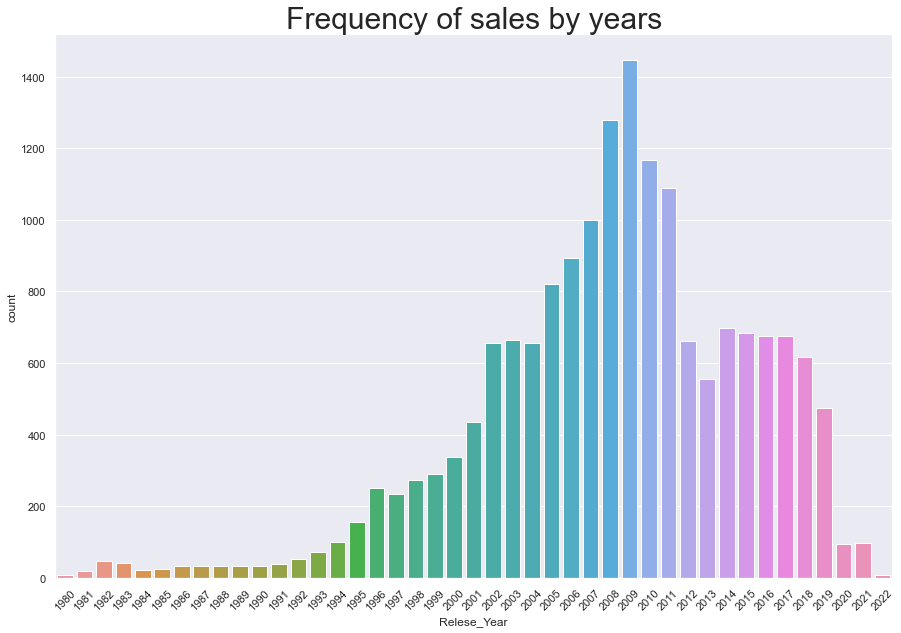

Relese Year  Game
29         2009  1446
28         2008  1279
30         2010  1167
31         2011  1088
27         2007   999
26         2006   894
25         2005   821
34         2014   697
35         2015   685
37         2017   676

In [207]:
#Frequency of Games by years

plt.figure(figsize=(15, 10))
sns.countplot(x="Relese_Year", data=clean_df).set_title("Frequency of sales by years",fontsize=30)
plt.xticks(rotation=45)
plt.show()

year_game = clean_df.pivot_table(index = 'Relese_Year', values= 'Game', aggfunc='count' ).reset_index()
year_game.columns = ['Relese Year', 'Game']
year_game = year_game.sort_values('Game', ascending=False)
year_game.head(10)

**Conclusion:** The years with the highest game releases are between 2008-2010

In [208]:
clean_df.corr()

Pos     Genre   Console  Publisher  Developer  NA_Sales  \
Pos           1.000000 -0.170797  0.127467  -0.049572   0.047552  0.073428   
Genre        -0.170797  1.000000  0.005907  -0.061646  -0.052797 -0.003753   
Console       0.127467  0.005907  1.000000  -0.013100   0.028273  0.125579   
Publisher    -0.049572 -0.061646 -0.013100   1.000000   0.340581 -0.045964   
Developer     0.047552 -0.052797  0.028273   0.340581   1.000000  0.024361   
NA_Sales      0.073428 -0.003753  0.125579  -0.045964   0.024361  1.000000   
PAL_Sales     0.071027 -0.001868  0.097945  -0.015174   0.029542  0.705540   
Japan_Sales   0.073542  0.033281 -0.018233   0.009583  -0.015457  0.063009   
Other_Sales   0.074379 -0.002082  0.108071  -0.018364   0.029688  0.717303   
Total_Sales  -0.104049  0.017038  0.031859   0.008394   0.000976  0.029361   
Relese_Month  0.057991 -0.029139  0.029502  -0.054246   0.023644  0.094505   
Relese_Year   0.155601 -0.081551  0.086052   0.099944   0.047055 -0.073579   
Hit_Games    -0.270035  0.036791 -0.054002   0.020003   0.020000  0.324562   

              PAL_Sales  Japan_Sales  Other_Sales  Total_Sales  Relese_Month  \
Pos            0.071027     0.073542     0.074379    -0.104049      0.057991   
Genre         -0.001868     0.033281    -0.002082     0.017038     -0.029139   
Console        0.097945    -0.018233     0.108071     0.031859      0.029502   
Publisher     -0.015174     0.009583    -0.018364     0.008394     -0.054246   
Developer      0.029542    -0.015457     0.029688     0.000976      0.023644   
NA_Sales       0.705540     0.063009     0.717303     0.029361      0.094505   
PAL_Sales      1.000000     0.116696     0.841534     0.039182      0.078238   
Japan_Sales    0.116696     1.000000     0.129240    -0.013053     -0.017047   
Other_Sales    0.841534     0.129240     1.000000     0.036647      0.087403   
Total_Sales    0.039182    -0.013053     0.036647     1.000000      0.024426   
Relese_Month   0.078238    -0.017047     0.087403     0.024426      1.000000   
Relese_Year    0.006862    -0.136384     0.030292    -0.082202     -0.049020   
Hit_Games      0.293375     0.016109     0.288482     0.245717      0.050838   

              Relese_Year  Hit_Games  
Pos              0.155601  -0.270035  
Genre           -0.081551   0.036791  
Console          0.086052  -0.054002  
Publisher        0.099944   0.020003  
Developer        0.047055   0.020000  
NA_Sales        -0.073579   0.324562  
PAL_Sales        0.006862   0.293375  
Japan_Sales     -0.136384   0.016109  
Other_Sales      0.030292   0.288482  
Total_Sales     -0.082202   0.245717  
Relese_Month    -0.049020   0.050838  
Relese_Year      1.000000  -0.088680  
Hit_Games       -0.088680   1.000000

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Month

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Frequency of sales by month')

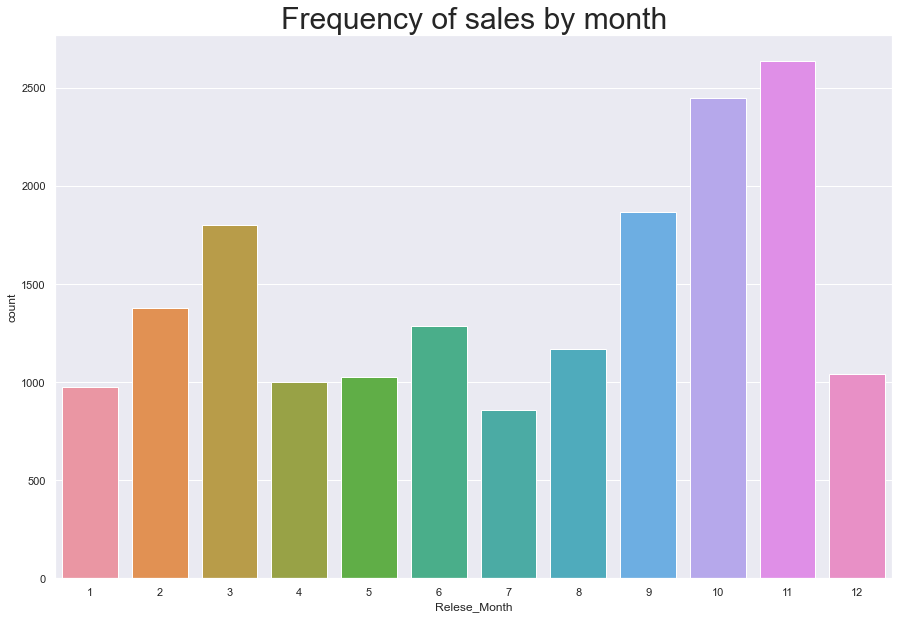

Relese Month  Game
10            11  2639
9             10  2450
8              9  1868
2              3  1799
1              2  1376
5              6  1288
7              8  1170
11            12  1039
4              5  1025
3              4   999

In [209]:
#Frequency of Games by month

plt.figure(figsize=(15, 10))
sns.countplot(x="Relese_Month", data=clean_df).set_title("Frequency of sales by month",fontsize=30)
plt.show()

month_game = clean_df.pivot_table(index = 'Relese_Month', values= 'Game', aggfunc='count' ).reset_index()
month_game.columns = ['Relese Month', 'Game']
month_game = month_game.sort_values('Game', ascending=False)
month_game.head(10)


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Console

Text(0.5, 1.0, 'Consoles with the highest number of games')

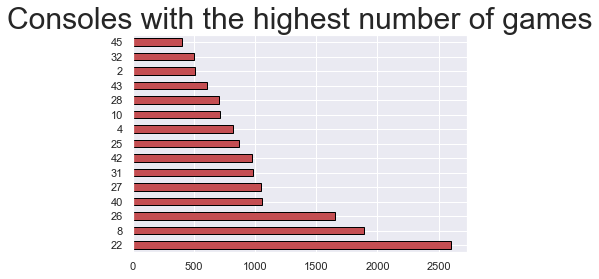

Console  Game
22       22  2604
8         8  1890
26       26  1650
40       40  1060
27       27  1053
31       31   987
42       42   974
25       25   866
4         4   817
10       10   711
28       28   707
43       43   604
2         2   512
32       32   502
45       45   405

In [210]:
# Consoles with the most Games

clean_df["Console"].value_counts()[:15].plot(kind = 'barh', color="r",edgecolor='black').set_title('Consoles with the highest number of games',fontsize=30)
plt.rcParams["figure.figsize"] = [30, 13]
plt.show()

console_game = clean_df.pivot_table(index = 'Console', values= 'Game', aggfunc='count' ).reset_index()
console_game.columns = ['Console', 'Game']
console_game = console_game.sort_values('Game', ascending=False)
console_game.head(15)

**Conclusion:** The consoles with the most games are PC Nintendo DS & PS2

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Publisher

Text(0, 0.5, 'Amount')

Text(0.5, 0, 'Publisher')

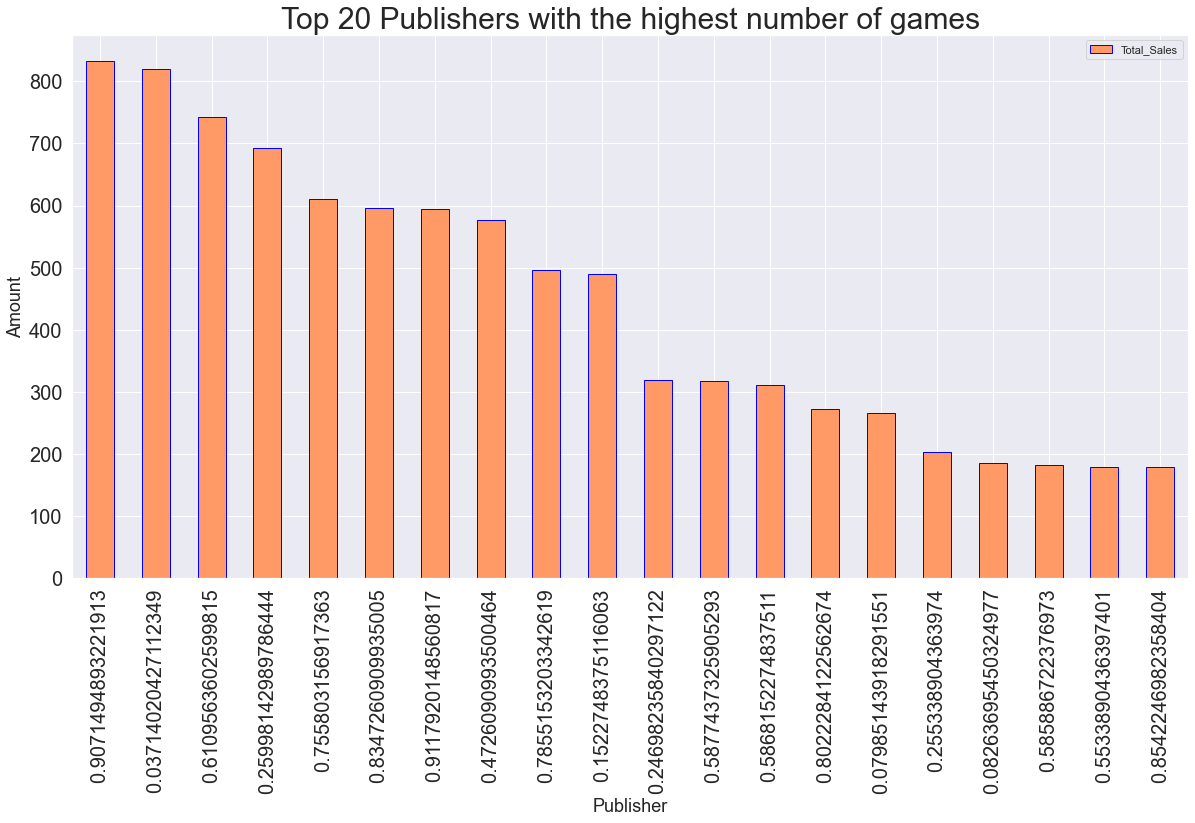

Publisher  Game
977   0.907149   833
40    0.037140   820
658   0.610956   743
280   0.259981   692
814   0.755803   610
899   0.834726   596
982   0.911792   595
509   0.472609   577
846   0.785515   496
164   0.152275   490
266   0.246982   320
633   0.587744   317
632   0.586815   312
864   0.802228   272
86    0.079851   266

In [211]:
# publishers with the most Games

top_publishers = clean_df[["Publisher", "Total_Sales"]].groupby("Publisher").count().sort_values("Total_Sales", ascending=False).head(20)
top_publishers.plot.bar(title="Top 20 Publishers with the highest number of games",figsize=(20,10),fontsize=20,color = '#ff9966',edgecolor='blue').title.set_size(30)
plt.ylabel("Amount",fontsize=18)
plt.xlabel("Publisher",fontsize=18) 
plt.show()

Publisher_game = clean_df.pivot_table(index = 'Publisher', values= 'Game', aggfunc='count' ).reset_index()
Publisher_game.columns = ['Publisher', 'Game']
Publisher_game = Publisher_game.sort_values('Game', ascending=False)
Publisher_game.head(15)

Conclusion: The leading Publishers are Ubisoft, Activision & Nintendo

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Developer

Text(0, 0.5, 'Amount')

Text(0.5, 0, 'Developer')

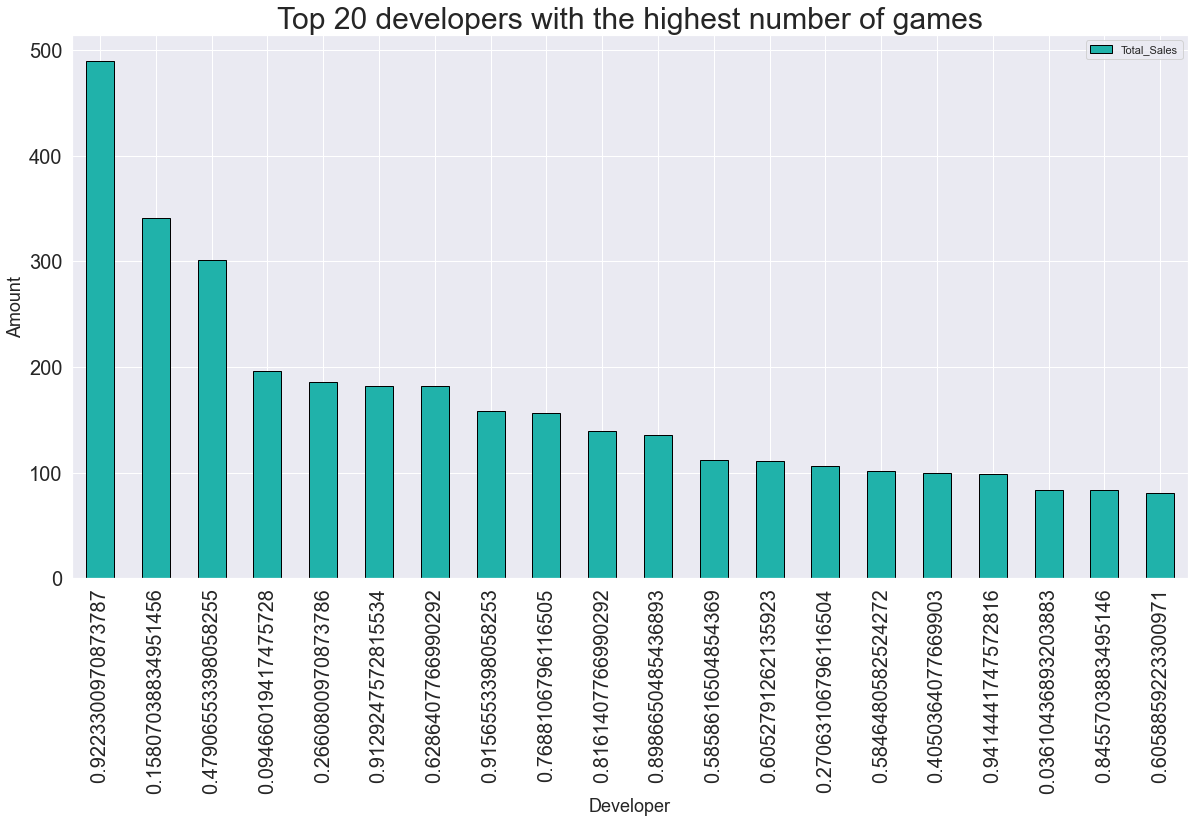

Developer  Game
3040   0.922330   490
521    0.158070   341
1579   0.479066   301
312    0.094660   196
877    0.266080   186
3009   0.912925   182
2072   0.628641   182
3018   0.915655   158
2534   0.768811   157
2690   0.816141   140
2962   0.898665   136
1931   0.585862   112
1995   0.605279   111
892    0.270631   106
1927   0.584648   102

In [212]:
# Developers with the most Games

top_publishers = clean_df[["Developer", "Total_Sales"]].groupby("Developer").count().sort_values("Total_Sales", ascending=False).head(20)
top_publishers.plot.bar(title="Top 20 developers with the highest number of games",figsize=(20,10),fontsize=20,color ='lightseagreen',edgecolor='black').title.set_size(30)
plt.ylabel("Amount",fontsize=18)
plt.xlabel("Developer",fontsize=18) 
plt.show()

developer_game = clean_df.pivot_table(index = 'Developer', values= 'Game', aggfunc='count' ).reset_index()
developer_game.columns = ['Developer', 'Game']
developer_game = developer_game.sort_values('Game', ascending=False)
developer_game.head(15)

**Conclusion:** The leading developers are who have released games are Capcom & Konami

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Genre

<AxesSubplot:ylabel='Genre'>

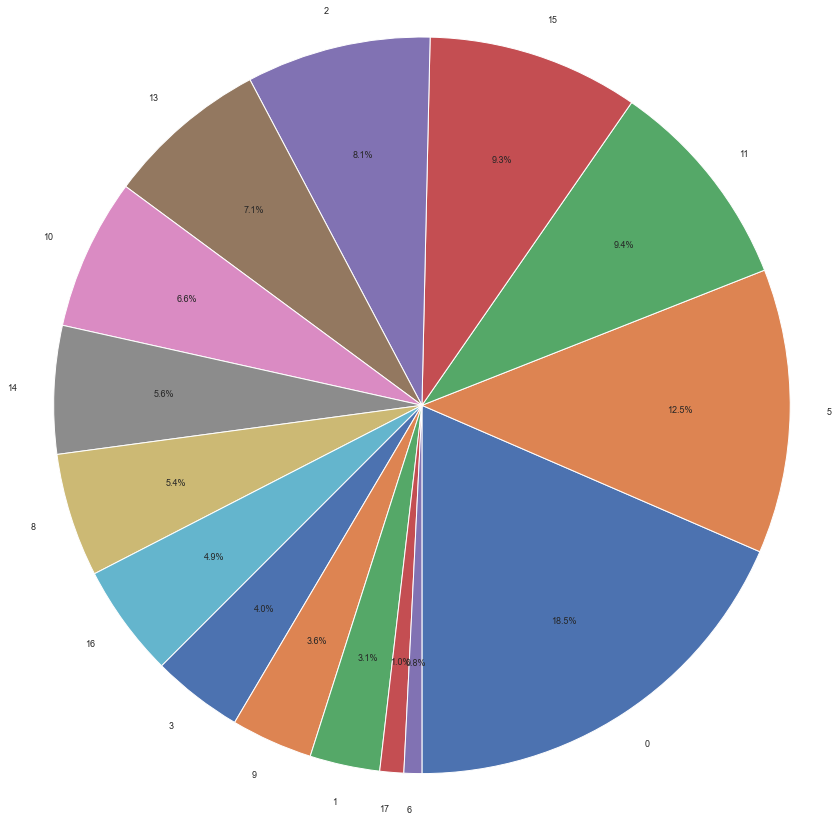

In [213]:
fig, axes = plt.subplots(figsize=(11, 17))
clean_df["Genre"].value_counts()[:15].plot(kind = 'pie', autopct='%1.1f%%', startangle=270, fontsize=9, pctdistance=0.7, radius = 1.5)
plt.show()

<Figure size 1800x900 with 0 Axes>

Text(0.5, 1.0, 'Genres with the highest number of games')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0'),
  Text(1, 0, '5'),
  Text(2, 0, '11'),
  Text(3, 0, '15'),
  Text(4, 0, '2'),
  Text(5, 0, '13'),
  Text(6, 0, '10'),
  Text(7, 0, '14'),
  Text(8, 0, '8'),
  Text(9, 0, '16'),
  Text(10, 0, '3'),
  Text(11, 0, '9'),
  Text(12, 0, '1'),
  Text(13, 0, '17'),
  Text(14, 0, '6'),
  Text(15, 0, '7'),
  Text(16, 0, '4'),
  Text(17, 0, '12')])

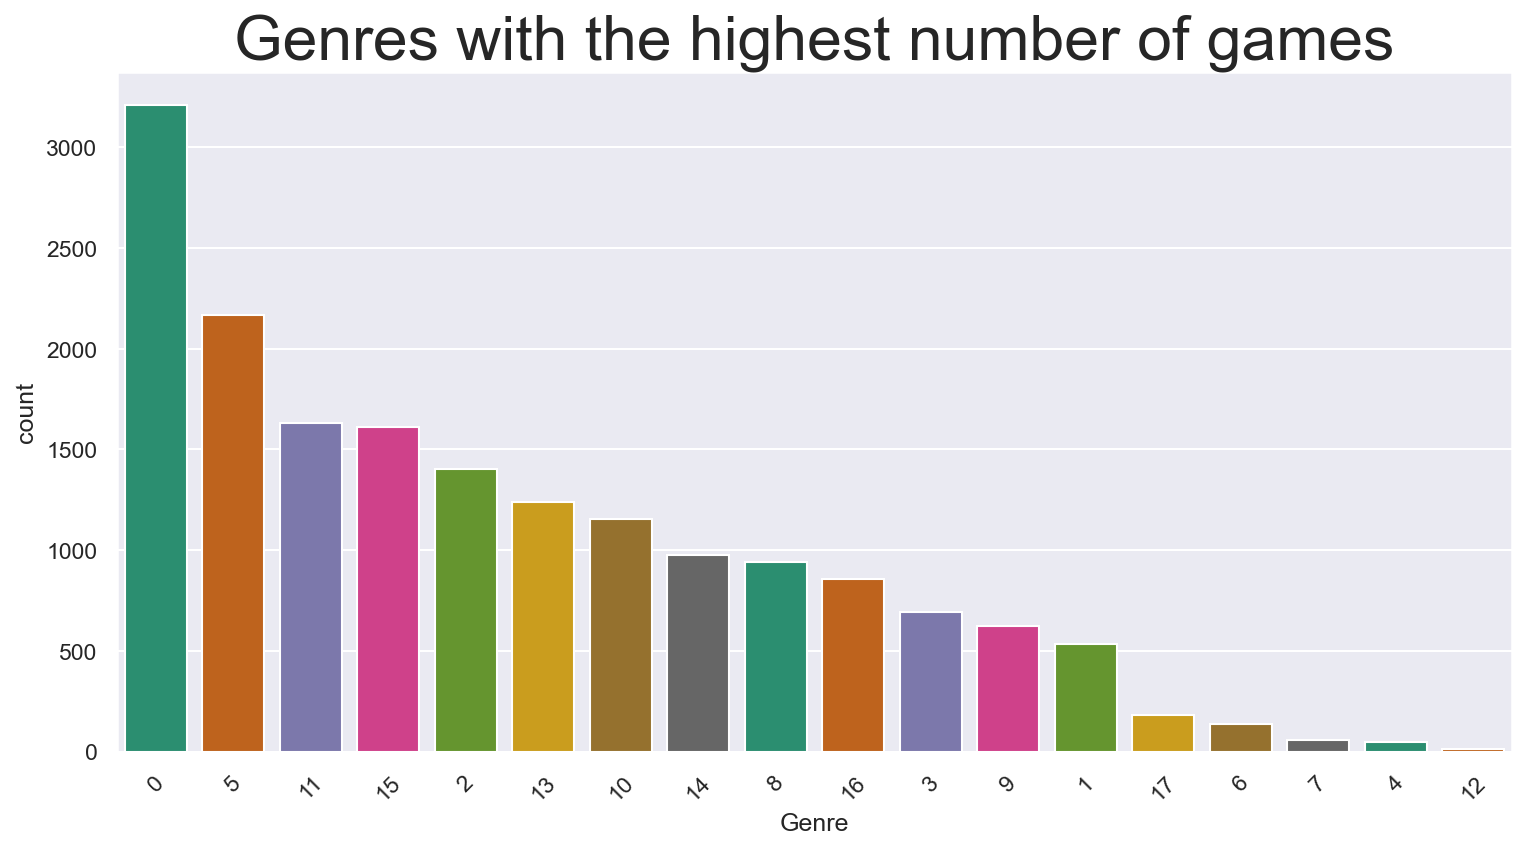

Genre  Game
0       0  3212
5       5  2169
11     11  1629
15     15  1613
2       2  1405
13     13  1240
10     10  1153
14     14   976
8       8   943
16     16   859

In [214]:
# Genre with the most Games

plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=clean_df,
              x="Genre",
              order = clean_df["Genre"].value_counts().index,
              palette="Dark2").set_title("Genres with the highest number of games",fontsize=30)
plt.xticks(rotation=45)
plt.show()

genre_game = clean_df.pivot_table(index = 'Genre', values= 'Game', aggfunc='count' ).reset_index()
genre_game.columns = ['Genre', 'Game']
genre_game = genre_game.sort_values('Game', ascending=False)
genre_game.head(10)

**conclusion:**  Games belonging to Action genre are leaders in the number of games per genre,
they control almost 20 percent of the video games market share and they are popular more than any other genre

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

NA_Sales, PAL_Sales & Japan_Sales

.

The average sales in each region

In [215]:
a=(clean_df['NA_Sales'].mean()*1000000)
b=(clean_df['PAL_Sales'].mean()*1000000)
c=(clean_df['Japan_Sales'].mean()*1000000)
d=(clean_df['Other_Sales'].mean()*1000000)
e=(clean_df['Total_Sales'].mean()*1000000)

print("The average sales in North America =", (f"{a:,.3f}"))
print("The average sales in Europe =",(f"{b:,.3f}"))
print("The average sales in Japan =",(f"{c:,.3f}"))
print("The average sales in other regions =",(f"{d:,.3f}"))
print("The average sales globally =",(f"{e:,.3f}"))

The average sales in North America = 138,874,020,701.092
The average sales in Europe = 79,487,047,521.016
The average sales in Japan = 27,123,005,661.348
The average sales in other regions = 26,922,856,979.470
The average sales globally = 2,624.422


**Conclusion:** The average game purchases in North America are higher than any other region

.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Bivariate Analysis

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<AxesSubplot:xlabel='Relese_Year'>

Text(0.5, 1.0, 'Years')

Text(0.5, 0, 'Relese_Year')

Text(0, 0.5, 'Hit_Games')

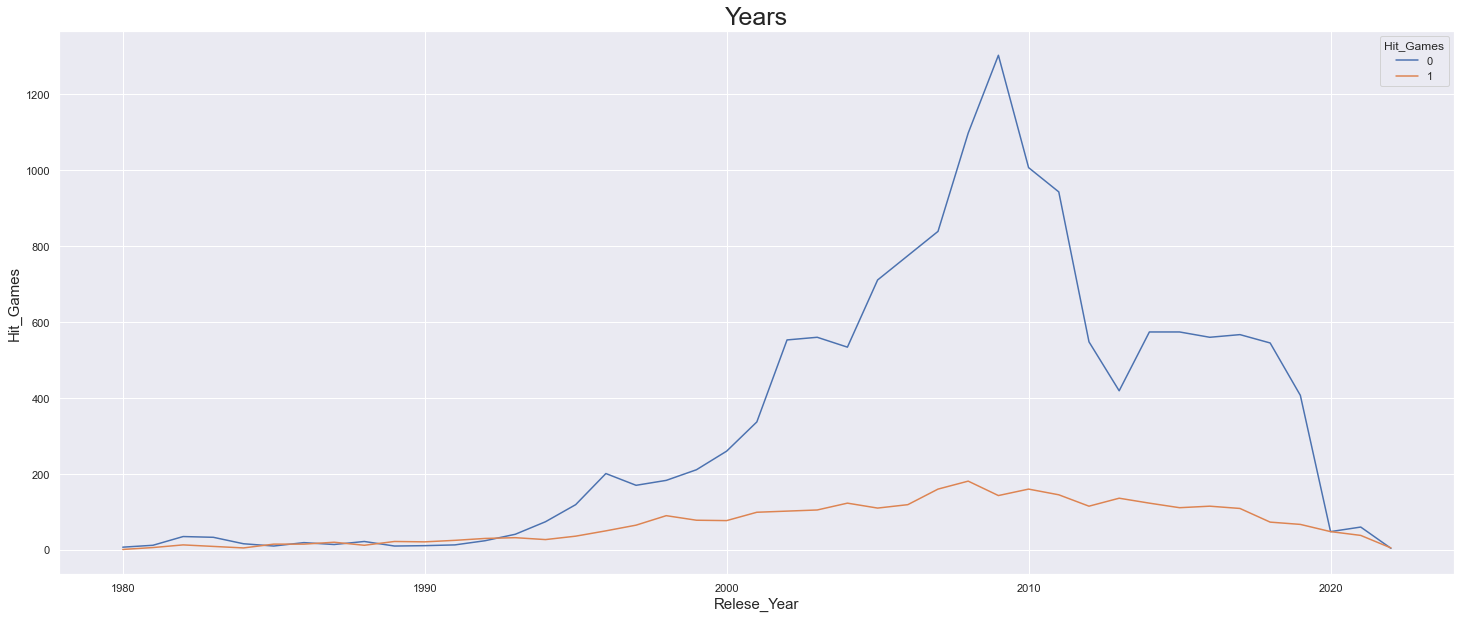

In [216]:
ct_year = pd.crosstab(clean_df['Relese_Year'],clean_df['Hit_Games'])
ct_year.plot(kind='line',figsize=(25,10))
plt.title('Years', fontsize=25)
plt.xlabel('Relese_Year', fontsize=15)
plt.ylabel('Hit_Games', fontsize=15)
plt.show()

<AxesSubplot:xlabel='Relese_Month'>

Text(0.5, 1.0, 'Months')

Text(0.5, 0, 'Relese_Month')

Text(0, 0.5, 'Hit_Games')

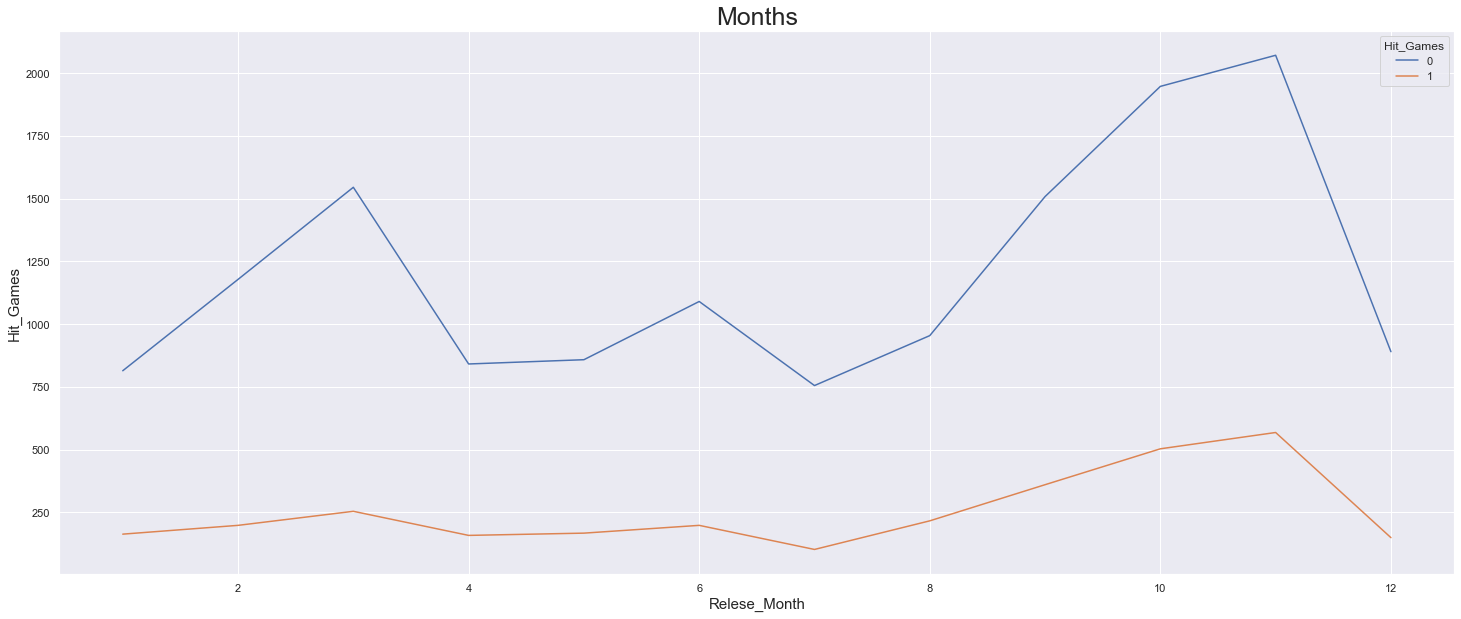

In [217]:
ct_month = pd.crosstab(clean_df['Relese_Month'],clean_df['Hit_Games'])
ct_month.plot(kind='line',figsize=(25,10))
plt.title('Months', fontsize=25)
plt.xlabel('Relese_Month', fontsize=15)
plt.ylabel('Hit_Games', fontsize=15)
plt.show()

<AxesSubplot:xlabel='Console'>

Text(0.5, 1.0, 'Consoles')

Text(0.5, 0, 'Console')

Text(0, 0.5, 'Hit_Games')

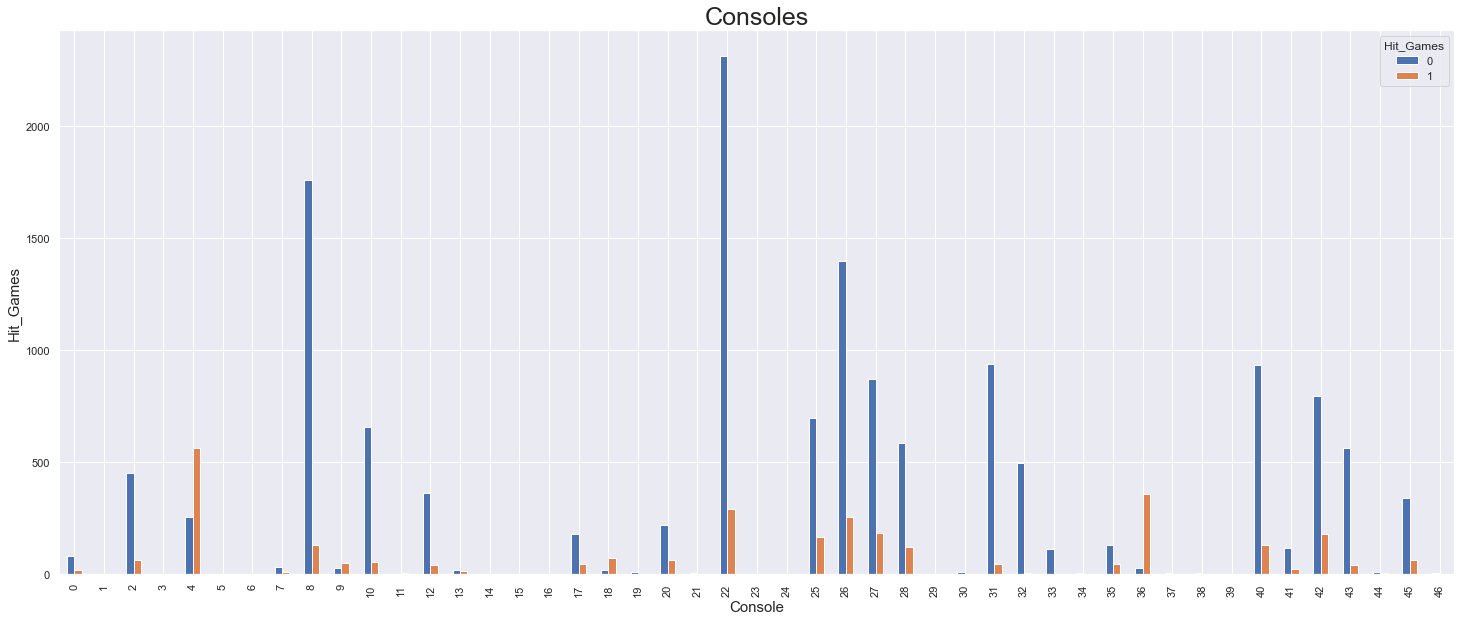

In [218]:
ct_console = pd.crosstab(clean_df['Console'],clean_df['Hit_Games'])
ct_console.plot(kind='bar',figsize=(25,10))
plt.title('Consoles', fontsize=25)
plt.xlabel('Console', fontsize=15)
plt.ylabel('Hit_Games', fontsize=15)
plt.show()

<AxesSubplot:xlabel='Genre'>

Text(0.5, 1.0, 'Genres')

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Hit_Games')

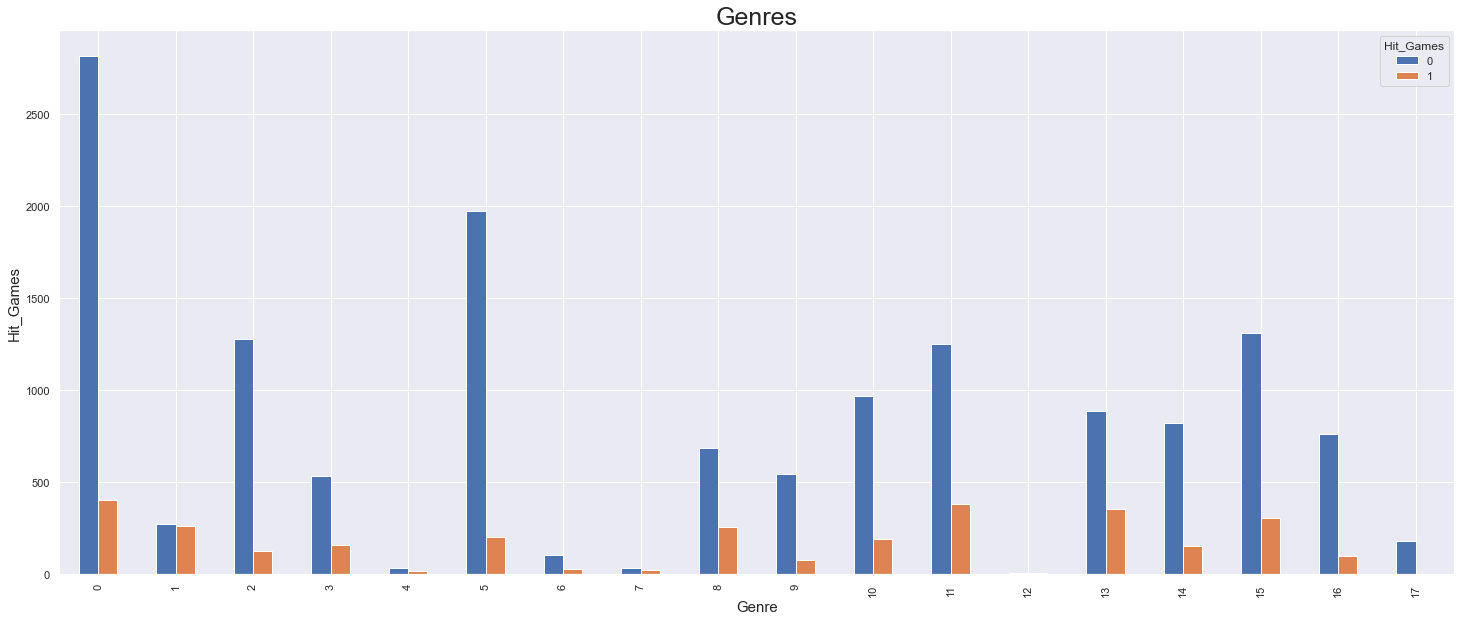

In [219]:
ct_genre = pd.crosstab(clean_df['Genre'],clean_df['Hit_Games'])
ct_genre.plot(kind='bar',figsize=(25,10))
plt.title('Genres', fontsize=25)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Hit_Games', fontsize=15)
plt.show()

In [220]:
from scipy.stats import chi2_contingency
ct_list = ['ct_year','ct_month','ct_console','ct_genre']
for i,ct in enumerate([ct_year,ct_month,ct_console,ct_genre]):
    if (chi2_contingency(ct)[1] < 0.05):
        print(f"Hit_games and {ct_list[i]} are highly correlated columns")
        print(f"The correlation value is {chi2_contingency(ct)[1]} \n")

Hit_games and ct_year are highly correlated columns
The correlation value is 2.582625807611994e-128 

Hit_games and ct_month are highly correlated columns
The correlation value is 6.756712932478744e-18 

Hit_games and ct_console are highly correlated columns
The correlation value is 0.0 

Hit_games and ct_genre are highly correlated columns
The correlation value is 4.3906689885818403e-190 



Years

Text(0, 0.5, 'Sales in Billions')

Text(0.5, 0, 'release_year')

Total_Sales
Relese_Year             
1998            2.674678
2011            2.537550
2007            2.220024
2009            1.921817
2008            1.759468
2006            1.711745
2003            1.669380
2004            1.665673
2010            1.608441
2017            1.503324

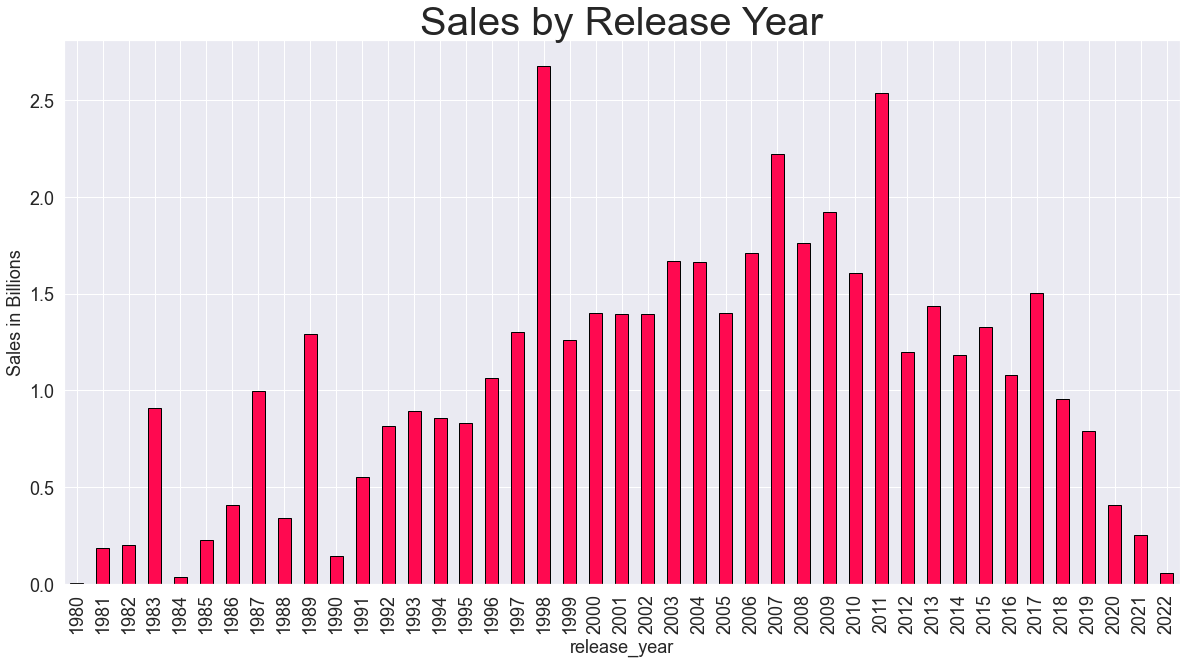

In [221]:
# Years with the most sales

title = "Sales by Release Year"
Year_sales = clean_df.groupby("Relese_Year").sum()["Total_Sales"].plot.bar(fontsize=18,color = '#ff0950',edgecolor='black',title=title,figsize=(20,10))
Year_sales.title.set_size(40)
Year_sales.set_ylabel("Sales in Billions",fontsize=18)
Year_sales.set_xlabel("release_year",fontsize=18)

# top 10 years with the highest total sales
sales_year = clean_df.groupby("Relese_Year").agg({"Total_Sales": pd.Series.sum})
sales_year.nlargest(10, "Total_Sales")

**Conclusion:** The years with the most sales are 1998, 2011 & 2007

<Figure size 2000x1400 with 0 Axes>

<AxesSubplot:xlabel='Relese_Year'>

Text(0.5, 1.0, 'Average sales per game by year')

0.040366262087026594

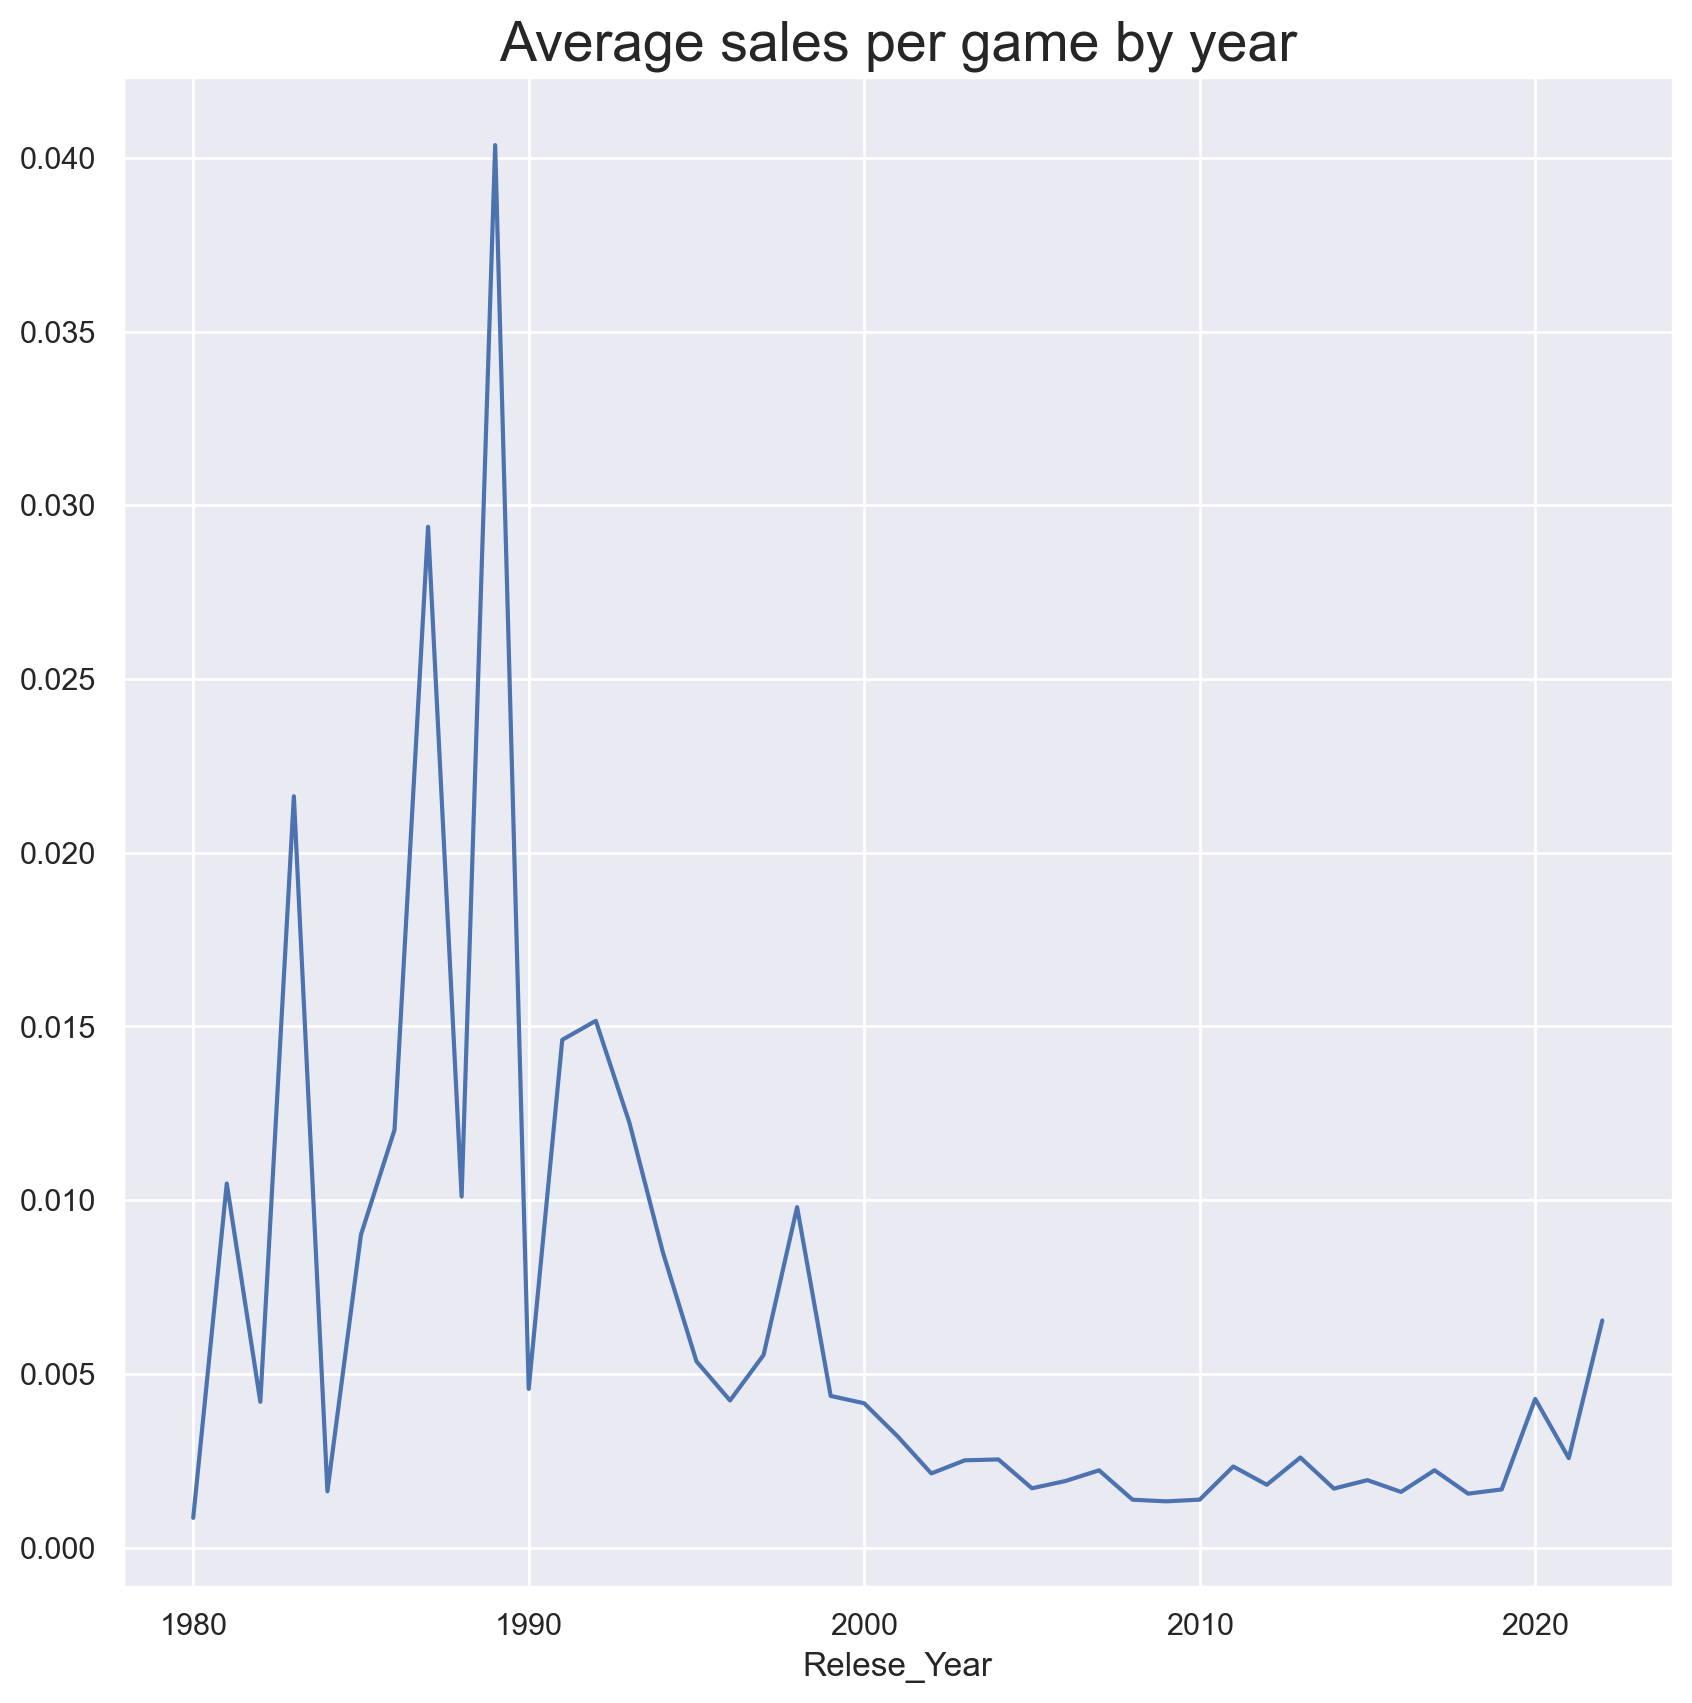

In [222]:
data = clean_df
df1 = data.groupby(['Relese_Year'])
plt.figure(figsize=(10,7), dpi=200)
df1_mean = df1['Total_Sales'].aggregate(np.mean)
df1_mean.plot(figsize=(10,10))
plt.title('Average sales per game by year', fontsize=20)
df1_mean.max()

**Conclusion:** This year most games received the highest average purchases is 1989

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Month

<Figure size 2000x1400 with 0 Axes>

<AxesSubplot:xlabel='Relese_Month'>

Text(0.5, 1.0, 'Average sales per game by month')

0.0038735840878126476

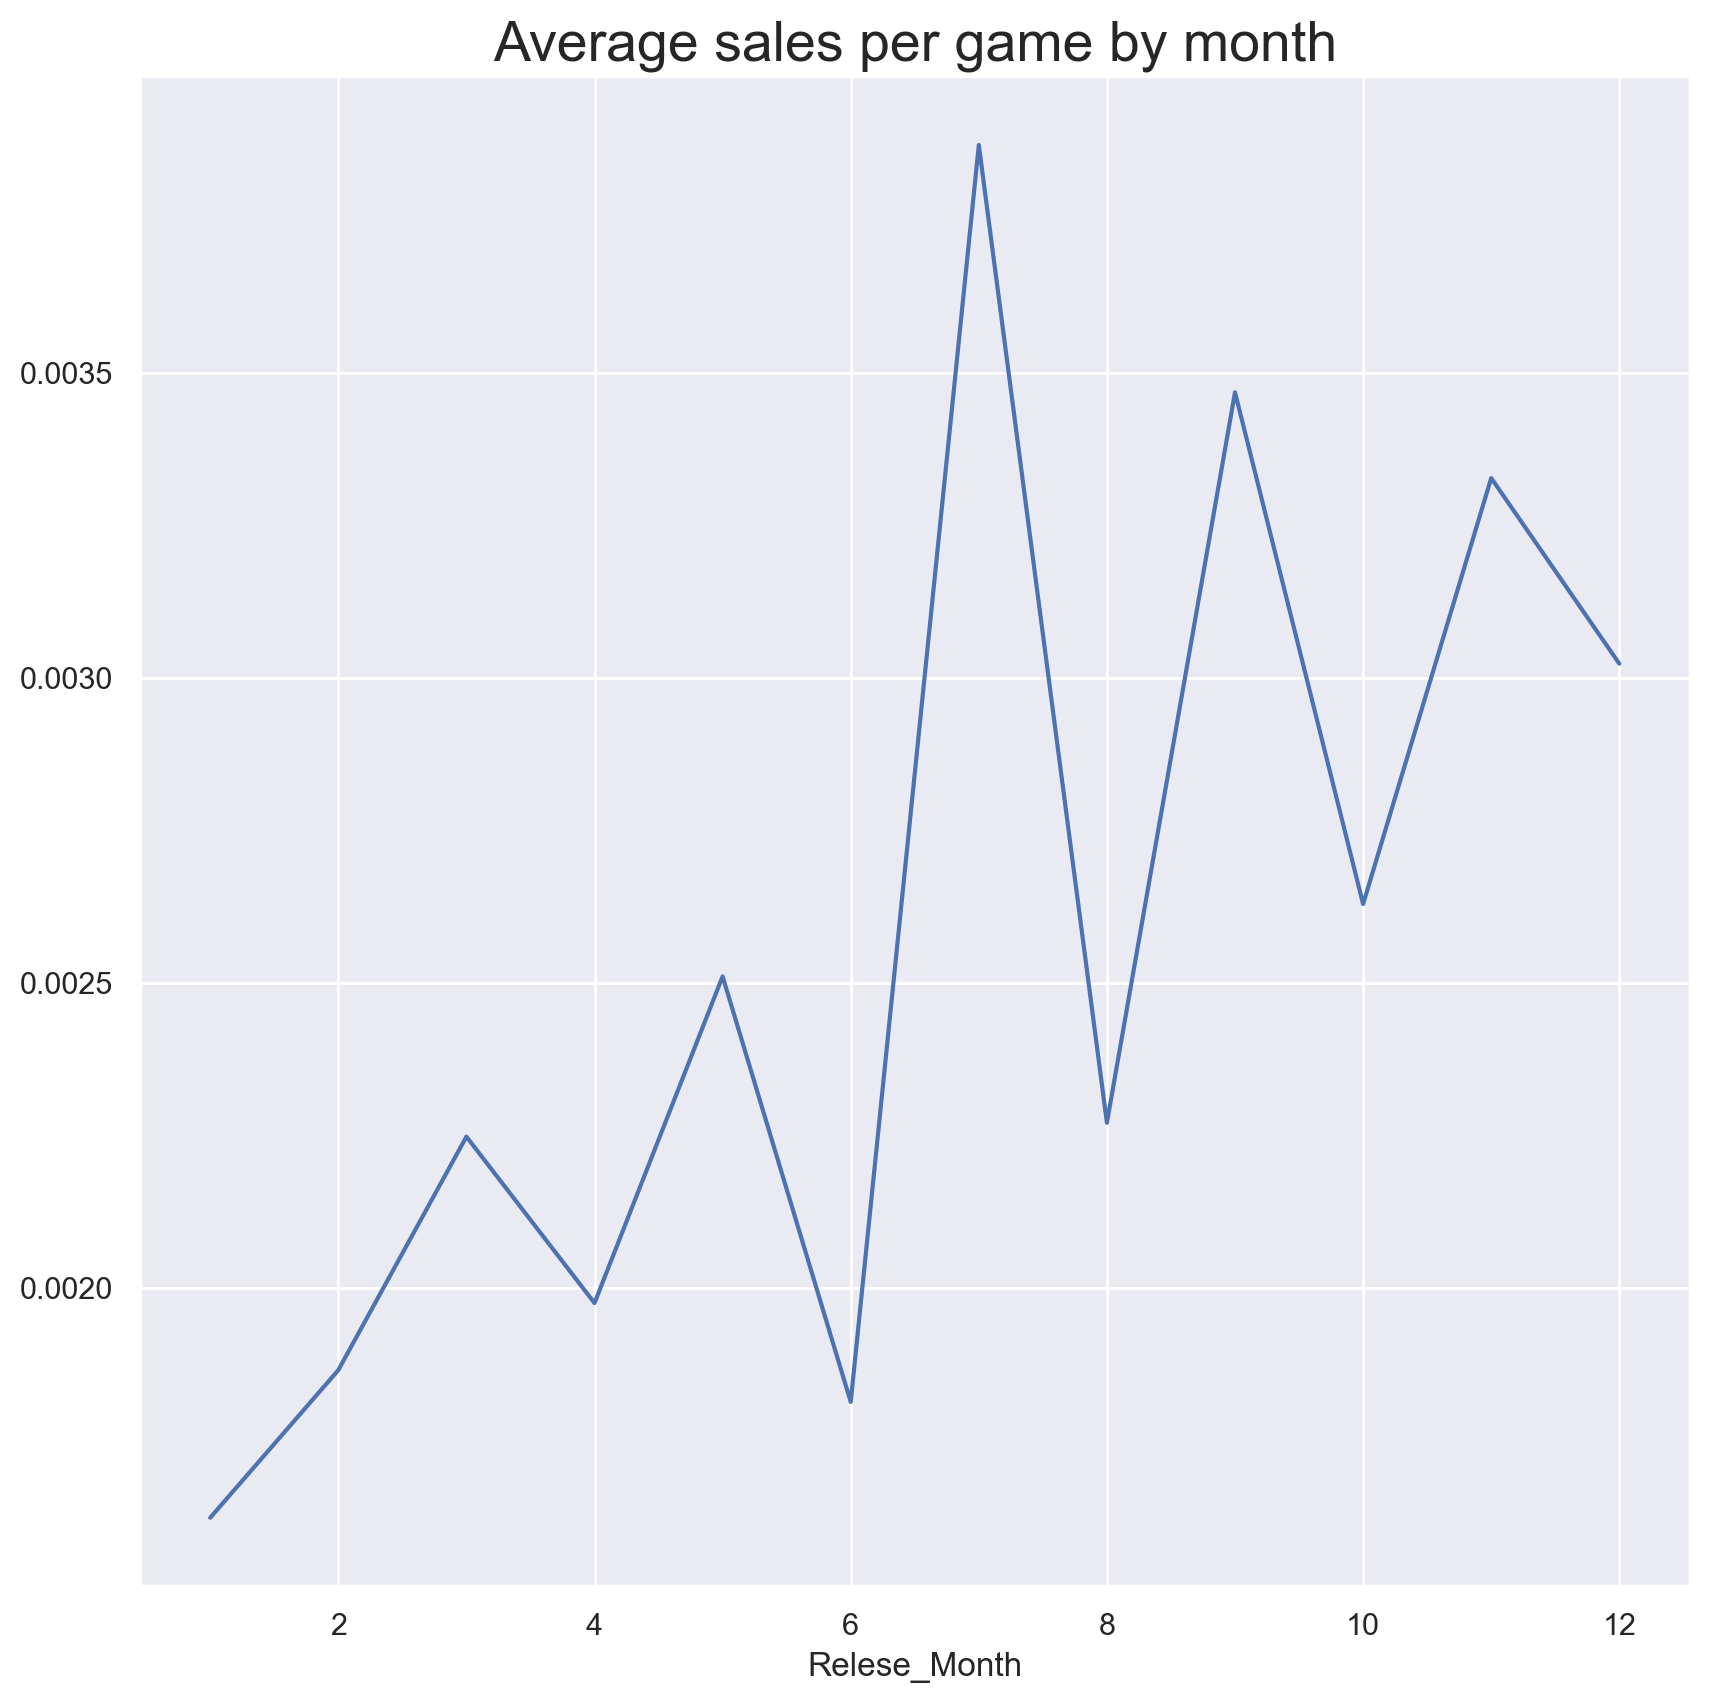

In [223]:
data = clean_df
df1 = data.groupby(['Relese_Month'])
plt.figure(figsize=(10,7), dpi=200)
df1_mean = df1['Total_Sales'].aggregate(np.mean)
df1_mean.plot(figsize=(10,10))
plt.title('Average sales per game by month', fontsize=20)
df1_mean.max()

**Conclusion:** The popular month to purchase games is July

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Console

Text(0, 0.5, 'Sales in Billions')

Text(0.5, 0, 'Console')

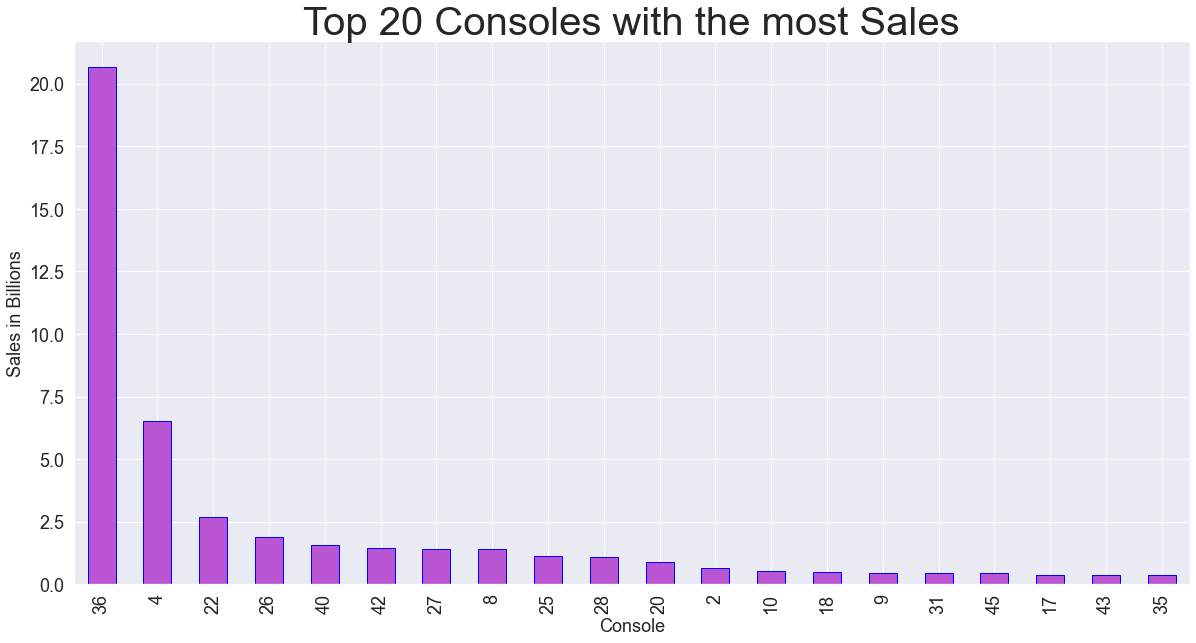

Total_Sales
Console             
36         20.683965
4           6.534629
22          2.693110
26          1.892687
40          1.563820
42          1.443674
27          1.423952
8           1.417365
25          1.112853
28          1.100282

In [224]:
#Sales from Total Global sales including Japan, Europe or North America

title = "Top 20 Consoles with the most Sales"
console_sales = clean_df.groupby("Console")\
    .sum()\
    .sort_values(by="Total_Sales", ascending=False)\
    .head(20)["Total_Sales"]\
    .plot.bar(title=title,  color = 'mediumorchid',edgecolor='blue'   ,figsize=(20,10),fontsize=18)
    
console_sales.title.set_size(40)
console_sales.set_ylabel("Sales in Billions",fontsize=18)
console_sales.set_xlabel("Console",fontsize=18)
plt.show()

# Top 10 consoles with the most sales
sales_console = clean_df.groupby("Console").agg({"Total_Sales": pd.Series.sum})
sales_console.nlargest(10, "Total_Sales")

**Conclusion:** The Consoles with the most sales are Xbox Series X & PC

<Figure size 2000x2000 with 0 Axes>

<AxesSubplot:xlabel='Console'>

Text(0.5, 1.0, 'Average sales per game by year')

0.05330918697093299

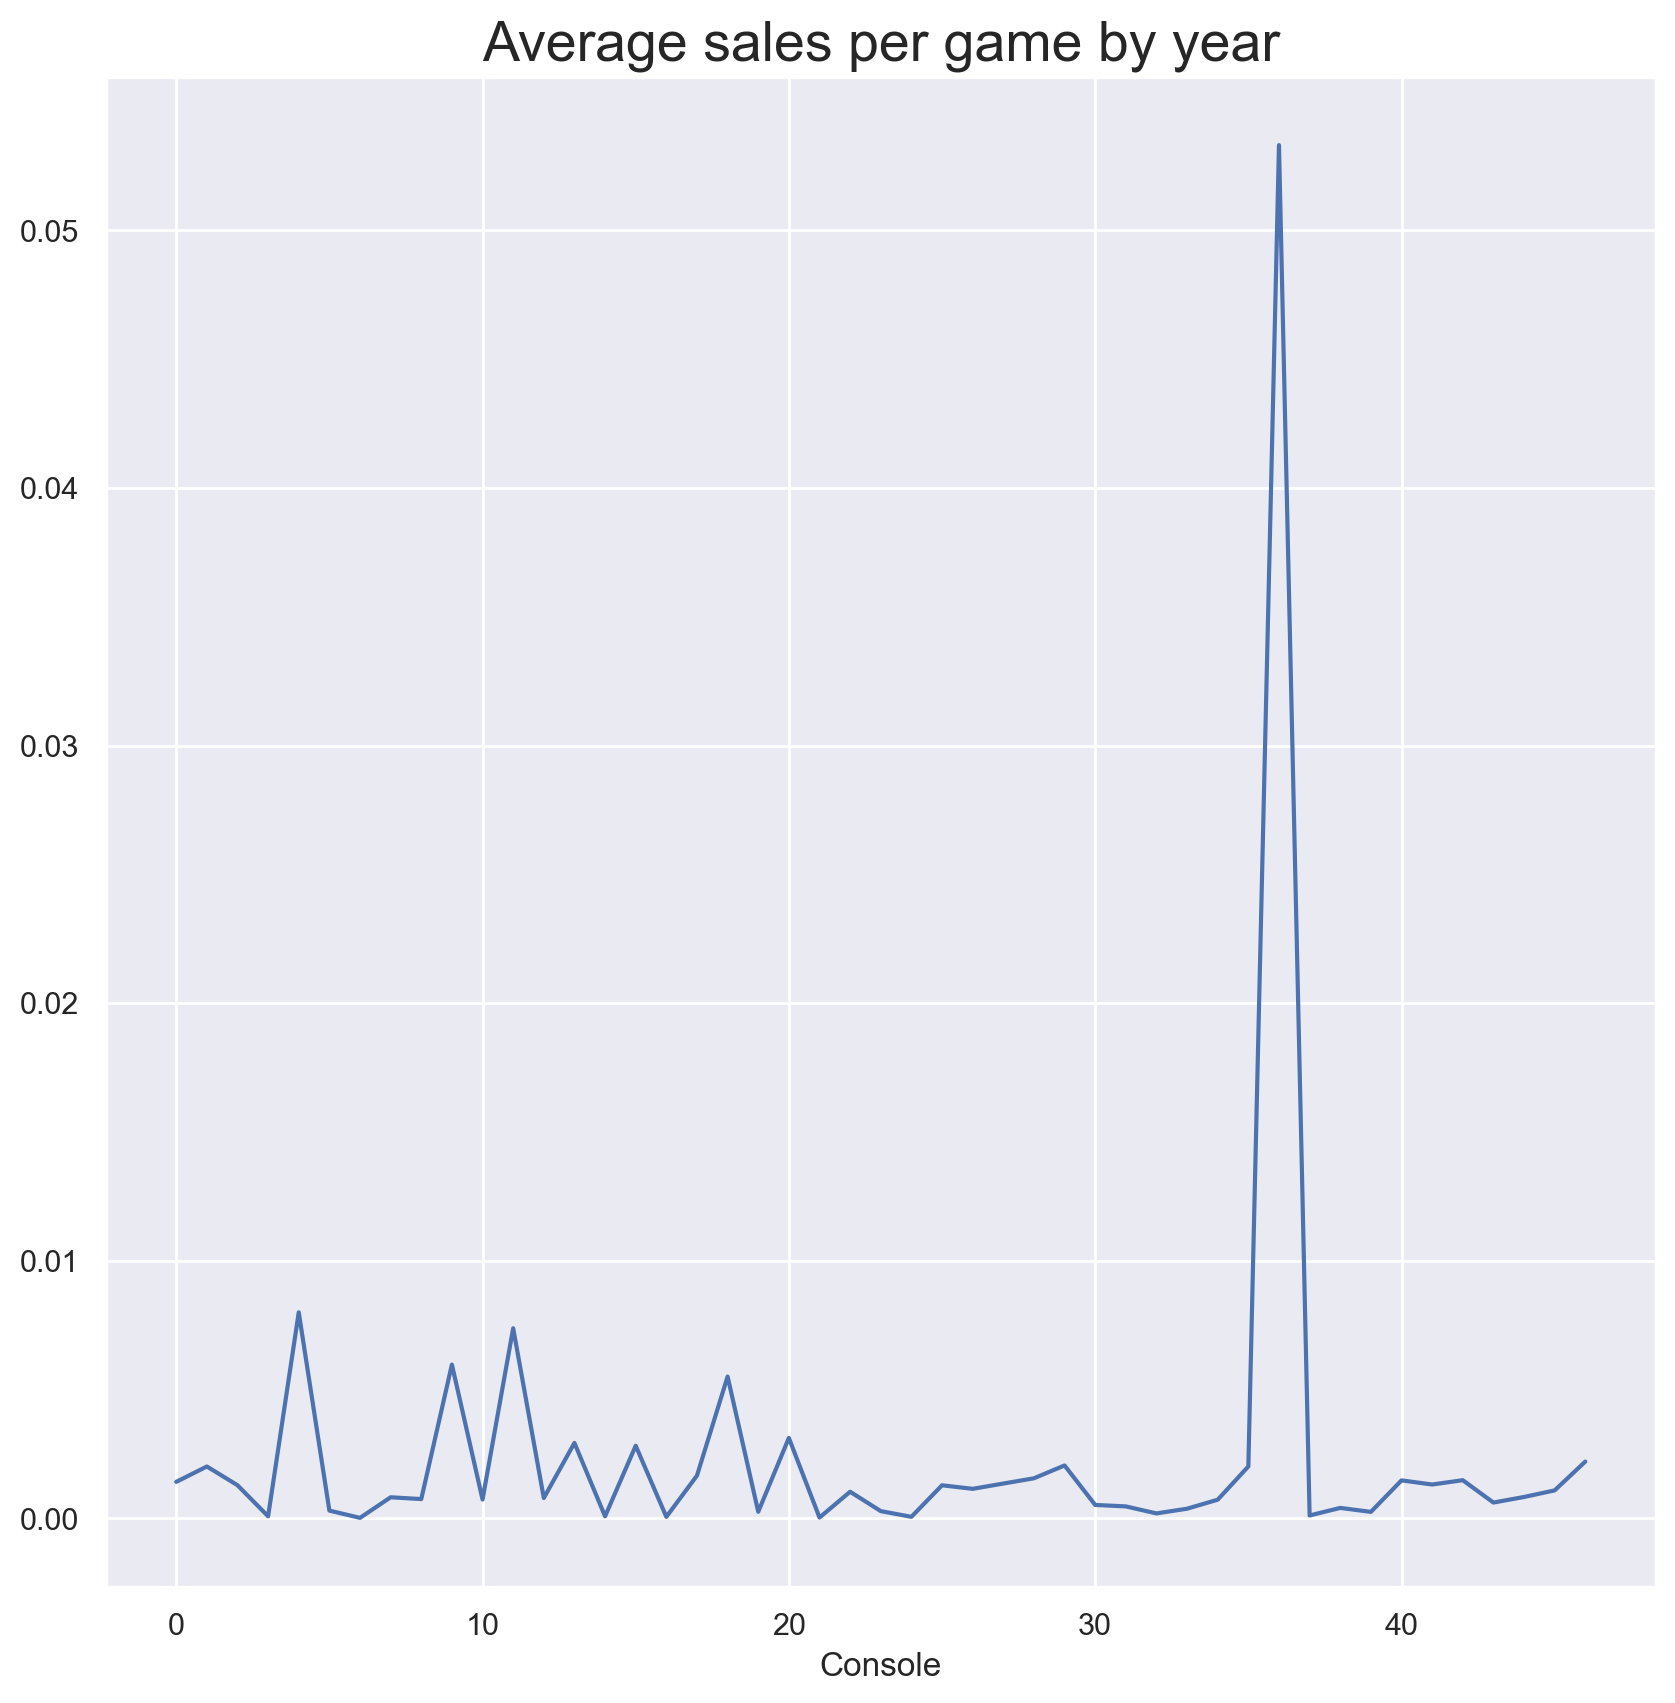

In [225]:
data = clean_df
df1 = data.groupby(['Console'])
plt.figure(figsize=(10,10), dpi=200)
df1_mean = df1['Total_Sales'].aggregate(np.mean)
df1_mean.plot(figsize=(10,10))
plt.title('Average sales per game by year', fontsize=20)
df1_mean.max()

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Text(0, 0.5, 'Sales in Billions')

Text(0.5, 0, 'Console')

Other_Sales
Console             
26         108500000
27          84600000
28          62130000
42          53890000
40          30510000
31          26960000
8           25430000
25          22830000
45          17410000
22          10070000

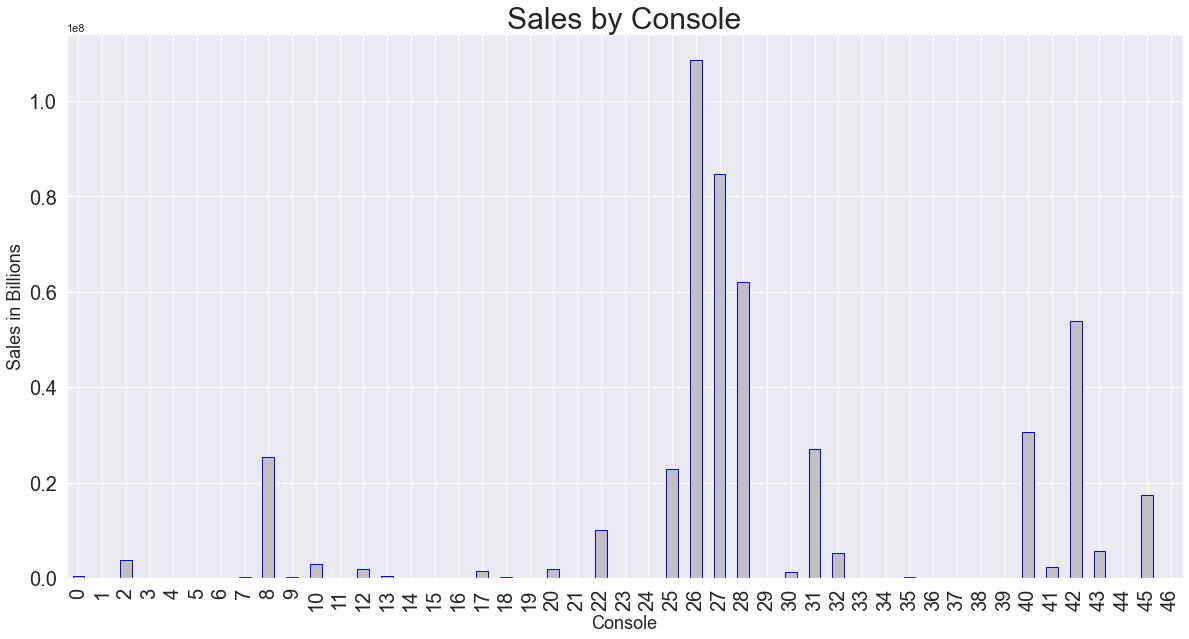

In [226]:
#Sales from Global sales excluding Japan, Europe or North America

title = "Sales by Console"

console_sales1 = clean_df.groupby("Console")\
    .sum()\
     ["Other_Sales"].plot.bar(title=title,color = 'silver',edgecolor='blue'  ,fontsize=20,figsize=(20,10))
console_sales1.title.set_size(30)
console_sales1.set_ylabel("Sales in Billions",fontsize=18)
console_sales1.set_xlabel("Console",fontsize=18)

# Top 10 consoles with the most sales
sales_console1 = clean_df.groupby("Console").agg({"Other_Sales": pd.Series.sum})
sales_console1.nlargest(10, "Other_Sales")

**Conclusion:** The Consoles with the most sales Unrelated to sales in NA, Europe or Japan are Xbox Series X & PC

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Developer

Text(0, 0.5, 'Sales in Billions')

Text(0.5, 0, 'Developer')

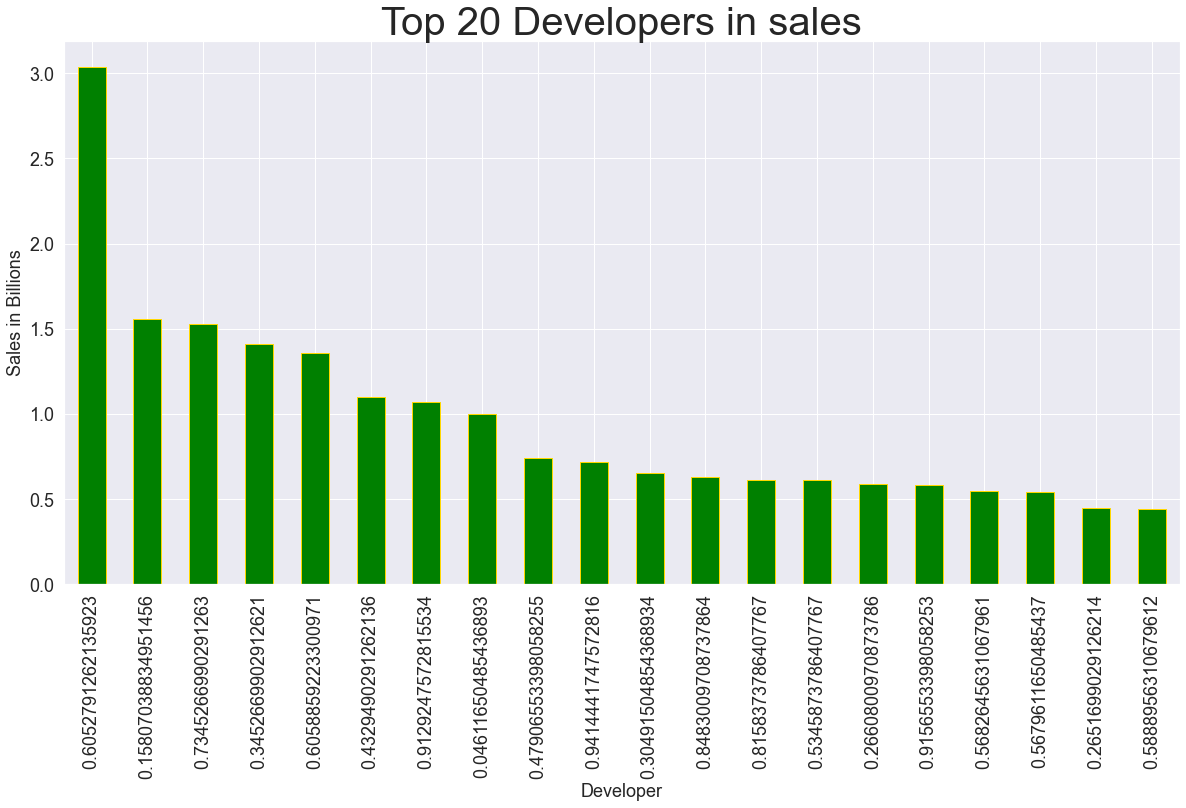

Total_Sales
Developer             
0.605279      3.039283
0.158070      1.555479
0.734527      1.528243
0.345267      1.410294
0.605886      1.358239
0.432949      1.100141
0.912925      1.067425
0.046117      1.000000
0.479066      0.739807
0.941444      0.716257

In [227]:
#Developers with the most sales

title = "Top 20 Developers in sales"

developer_sales = clean_df.groupby("Developer")\
    .sum()\
    .sort_values(by="Total_Sales", ascending=False)\
    .head(20)["Total_Sales"]\
    .plot.bar(title=title,color ='green',edgecolor='gold'  ,figsize=(20,10),fontsize=18)
    
developer_sales.title.set_size(40)
developer_sales.set_ylabel("Sales in Billions",fontsize=18)
developer_sales.set_xlabel("Developer",fontsize=18)
plt.show()

sales_developer = clean_df.groupby("Developer").agg({"Total_Sales": pd.Series.sum})
sales_developer.nlargest(10, "Total_Sales")

**Conclusion:** The Developers with the most sales are Nintendo & Capcom 

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Publisher

Text(0, 0.5, 'Sales in Millions')

Text(0.5, 0, 'Publisher')

Total_Sales
Publisher             
0.610956      9.502921
0.259981      3.023630
0.037140      2.300504
0.907149      2.227720
0.733519      2.049597
0.152275      1.713820
0.785515      1.700342
0.246982      1.581829
0.755803      1.250040
0.570102      1.037470

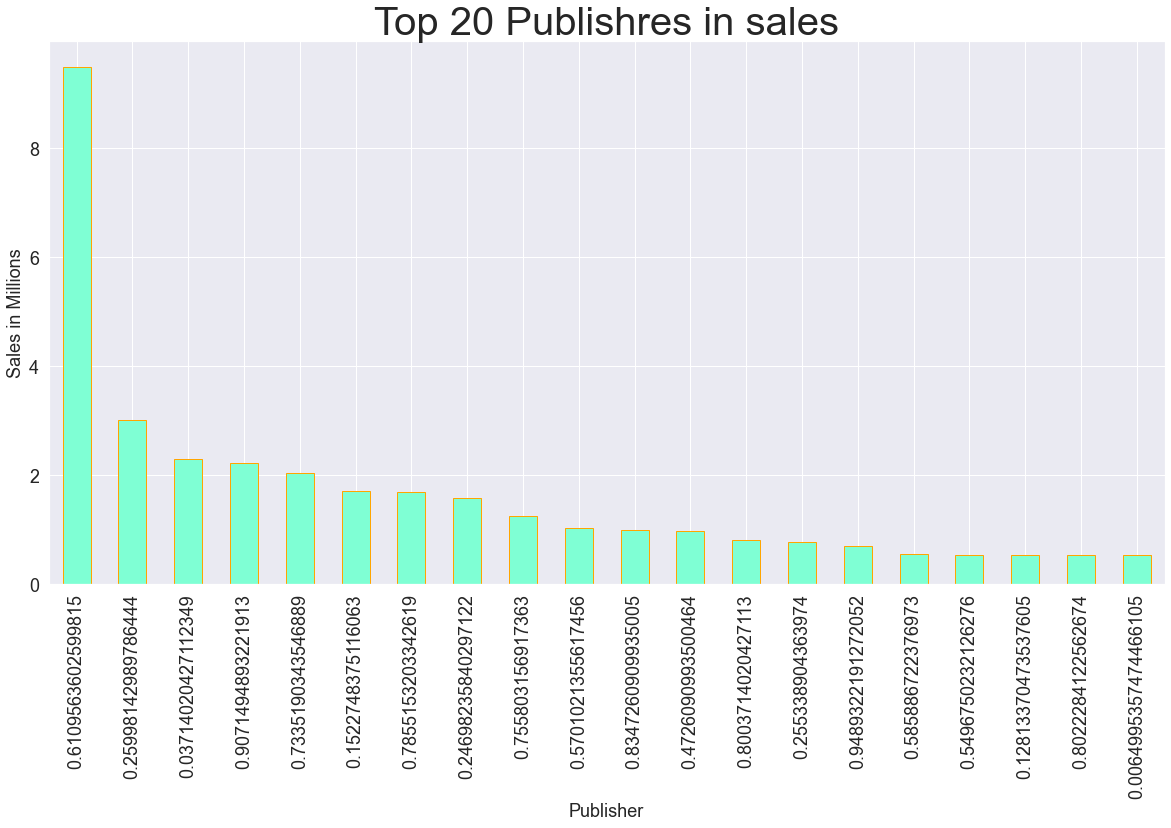

In [228]:
#Publishers with the most sales

title = "Top 20 Publishres in sales"

Publisher_sales = clean_df.groupby("Publisher")\
    .sum()\
    .sort_values(by="Total_Sales", ascending=False)\
    .head(20)["Total_Sales"]\
    .plot.bar(title=title, color = 'aquamarine',edgecolor='orange',figsize=(20,10),fontsize=18)
    
Publisher_sales.title.set_size(40)
Publisher_sales.set_ylabel("Sales in Millions",fontsize=18)
Publisher_sales.set_xlabel("Publisher",fontsize=18)


sales_Publisher = clean_df.groupby("Publisher").agg({"Total_Sales": pd.Series.sum})
sales_Publisher.nlargest(10, "Total_Sales")

**Conclusion:** The Publishers with the most sales are Nintendo & Electronic Arts 

:

**Conclusion from the last 2 graphs:**  Nintendo is one of the biggest Developer & Publisher company in the world

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Genre

Text(0, 0.5, 'Sales in Millions')

Text(0.5, 0, 'Genre')

Total_Sales
Genre             
1         7.000725
11        6.006869
13        5.821313
15        4.654089
8         3.810838
0         3.702156
10        2.605500
14        2.162006
9         2.030157
5         1.963094

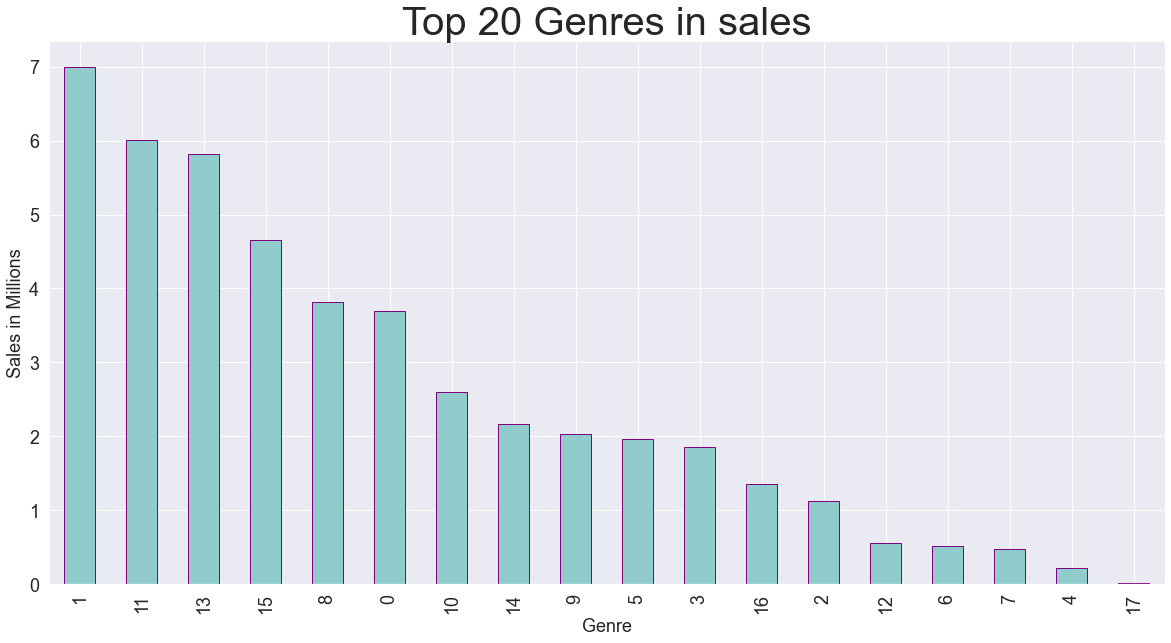

In [229]:
#Genres with the most sales

title = "Top 20 Genres in sales"

genre_sales = clean_df.groupby("Genre")\
    .sum()\
    .sort_values(by="Total_Sales", ascending=False)\
    .head(20)["Total_Sales"]\
    .plot.bar(title=title, color = '#91cccc',edgecolor='purple',figsize=(20,10),fontsize=18)
    
genre_sales.title.set_size(40)
genre_sales.set_ylabel("Sales in Millions",fontsize=18)
genre_sales.set_xlabel("Genre",fontsize=18)


sales_genre = clean_df.groupby("Genre").agg({"Total_Sales": pd.Series.sum})
sales_genre.nlargest(10, "Total_Sales")

**Conclusion:** The Genres with the most sales are Action-Adventure & Role-Playing

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Other Sales

<Figure size 2400x1200 with 0 Axes>

Text(0.5, 1.0, 'Frequency of other sales by year')

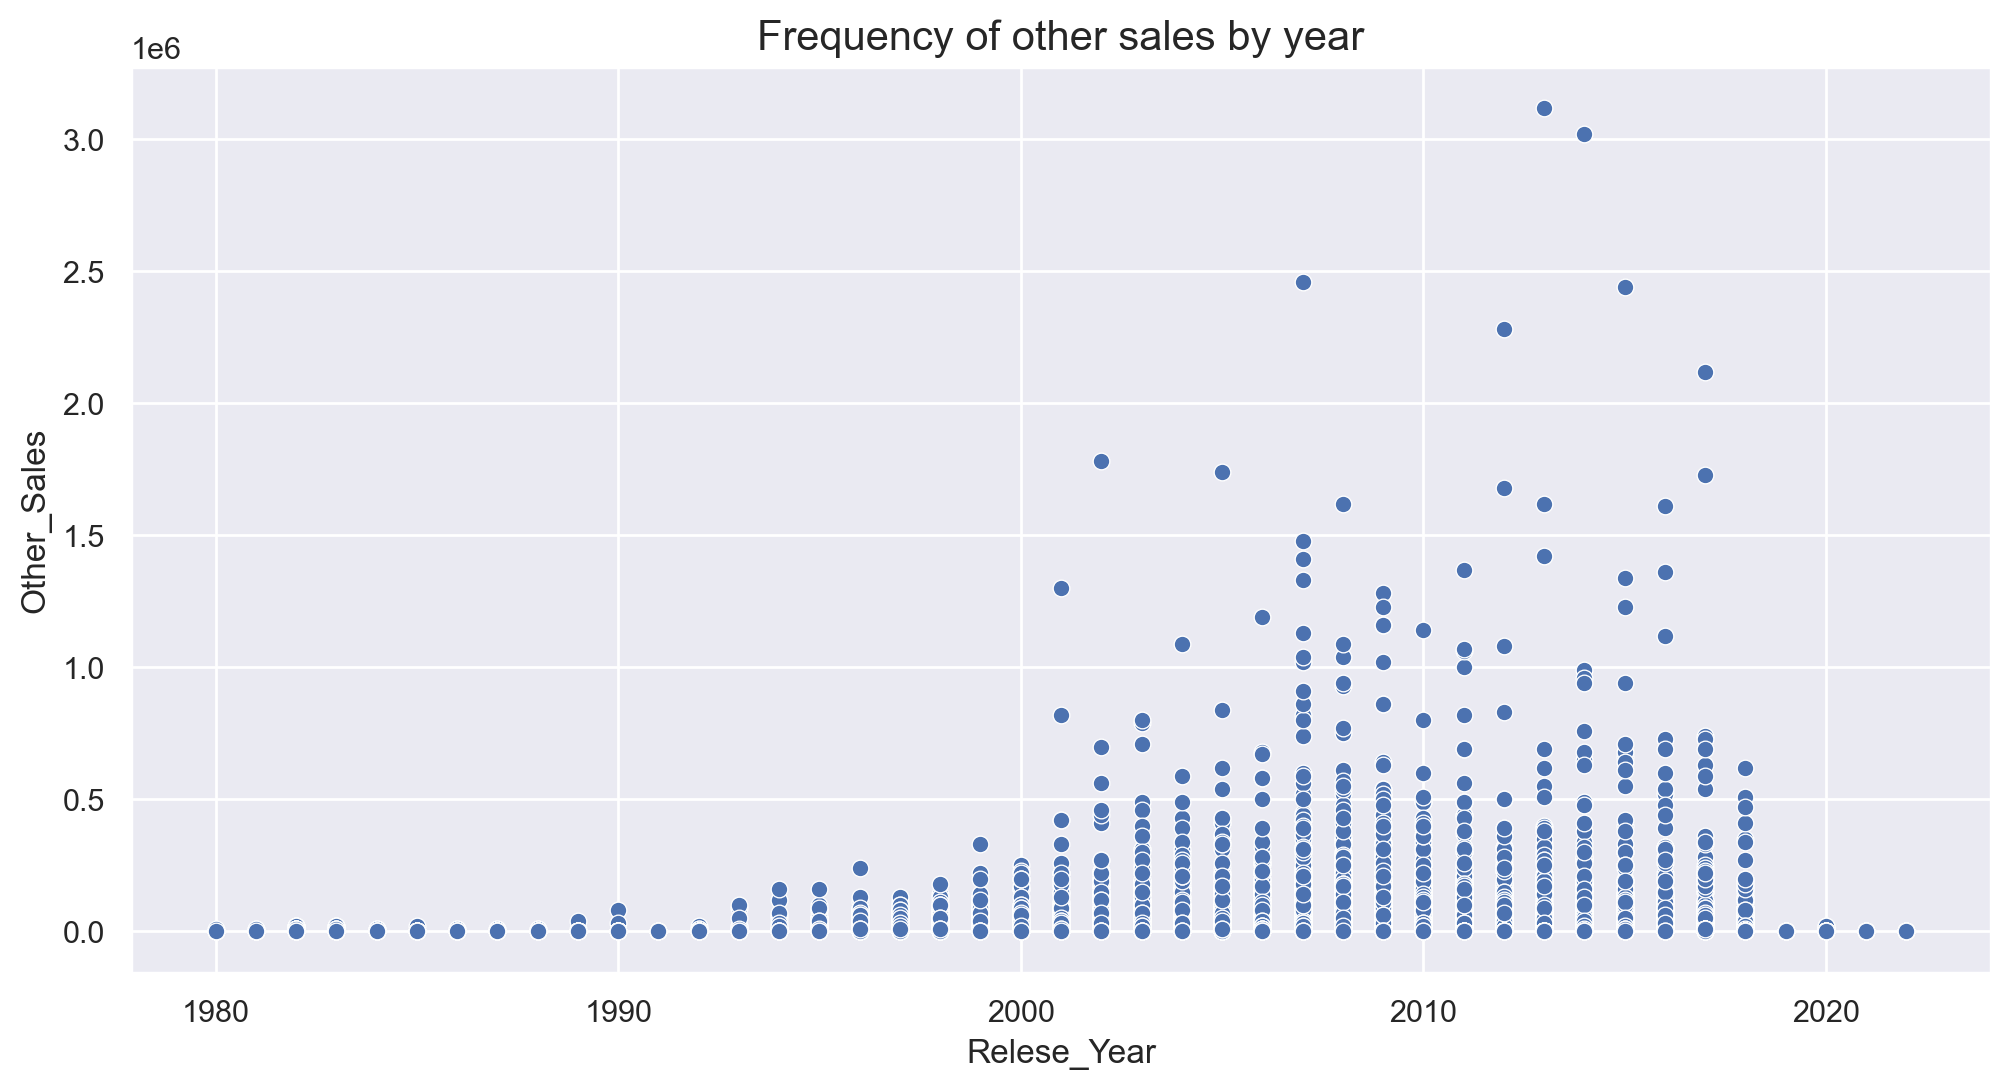

In [230]:
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(data=clean_df,
                x="Relese_Year",
                y="Other_Sales").set_title("Frequency of other sales by year",fontsize=15)
plt.show()

**Conclusion:** From the following scatterplot, we can see that most game belonging to 'other sales' made global sales of below roughly $1 million sales, 
with some exceptionally good ones going beyond that.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

NA_Sales, PAL_Sales & Japan_Sales

.

Plots that Showing the distribution of sales by region

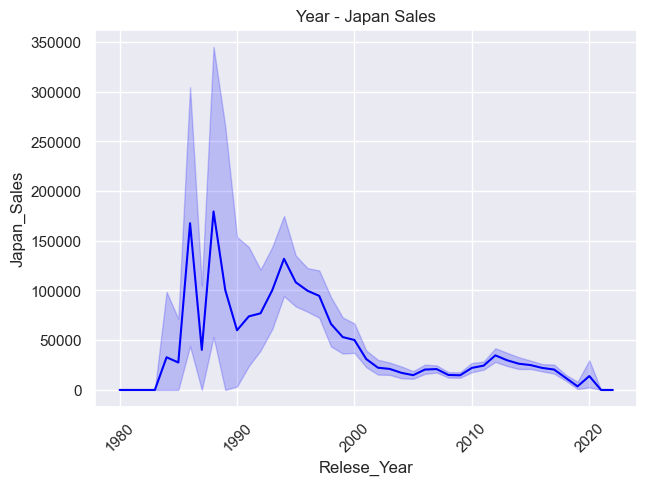

In [231]:
def Plots_by_year(title, sales, color):
    plt.figure(figsize = (7,5), dpi= 100)
    plt.title(title)
    plt.xticks(rotation = 45)
    sns.lineplot(x = 'Relese_Year', 
              y = sales,
              color = color, 
              data = clean_df)
    
Plots_by_year('Year - Japan Sales', 'Japan_Sales', 'blue')

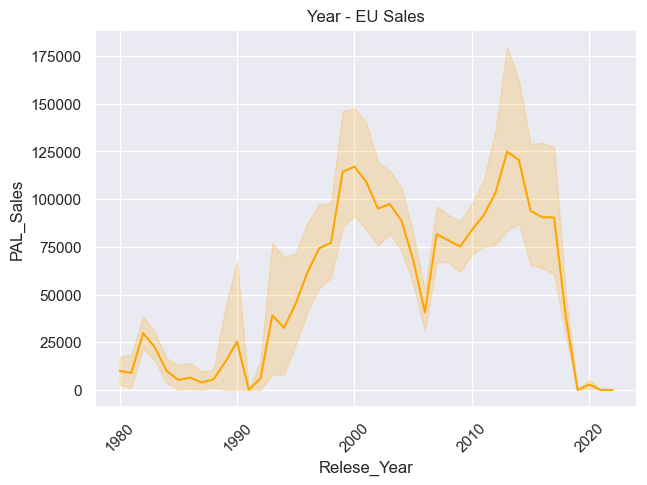

In [232]:
Plots_by_year('Year - EU Sales', 'PAL_Sales', 'orange')

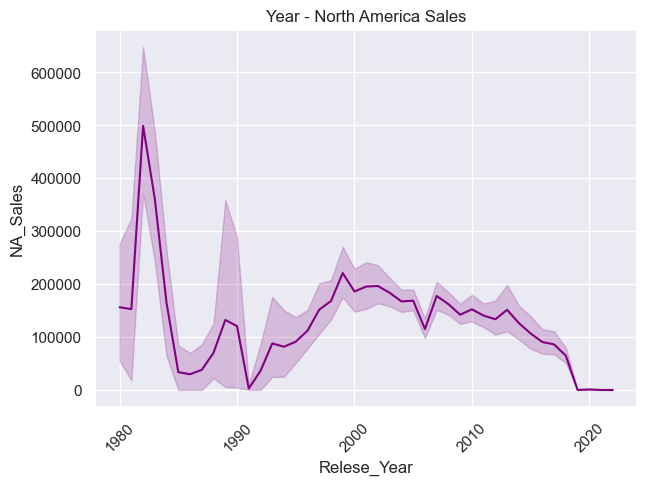

In [233]:
Plots_by_year('Year - North America Sales', 'NA_Sales', 'purple')

**Conclusion:** Sales in Europe peaked in the 2000s and on, while other regions peaked before the 2000s.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Top 5 games with the highest sales volume in each region

-The PS Platform is the popular console in Japan and Europe. However, it is a different story in NA - the leading consoles are XBOX 360 
    
-The dominating Games is 'Call of Duty: Black Ops' in north america and Grand Theft Auto V in Europe

-Sports is one of the leading genres in Japan and Europe, compared to NA which it's Action & Shooter

Frequency of Genre by years

Text(0.5, 1.0, 'Frequency of Genre by years')

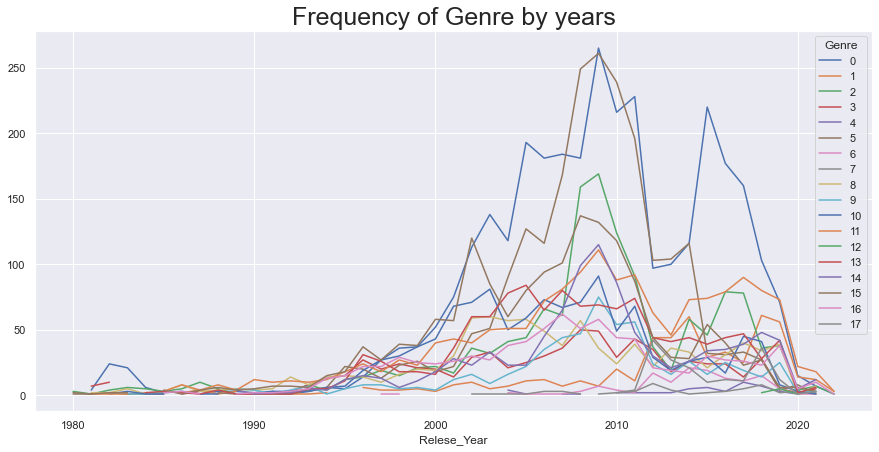

In [234]:
fig, ax = plt.subplots(figsize=(15,7))
clean_df.groupby(['Relese_Year','Genre']).count()['Game'].unstack().plot(ax=ax).set_title('Frequency of Genre by years',fontsize=25)

Games amount of each particular genre by year

Games amount of each particular genre by year

.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Multivariate Analysis

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

NA Sales, PAL Sales & Japan_Sales by Console

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Grouping North American, Japan, European & Other region sales data per Console

Distribution with percentages of the top 5 consoles by region

In [235]:
explode = [0.1,0.1,0.1,0.1,0.1]
colors = ['lightseagreen', 'mediumpurple', 'aquamarine', 'lawngreen', 'mediumorchid']

def platform_pie(title, sales):
    plt.title(title)
    plt.pie(sales, 
          labels = platforms1,
          wedgeprops=dict(width=0.2),
          shadow = True,
          colors = colors, 
          explode = explode, 
          startangle = 90, 
          autopct='%1.1f%%');

In [236]:
platforms1 = list(clean_df['Console'].value_counts()[:5].to_dict().keys())
sales_cols = ['NA_Sales', 'PAL_Sales', 'Japan_Sales', 'Other_Sales']
global_sales = []
na_sales = []
pal_sales = []
jp_sales = []
other_sales = []
for platform in platforms1:
    global_sales.append(clean_df[clean_df['Console'] == platform]['Total_Sales'].sum())
    na_sales.append(clean_df[clean_df['Console'] == platform]['NA_Sales'].sum())
    pal_sales.append(clean_df[clean_df['Console'] == platform]['PAL_Sales'].sum())
    jp_sales.append(clean_df[clean_df['Console'] == platform]['Japan_Sales'].sum())
    other_sales.append(clean_df[clean_df['Console'] == platform]['Other_Sales'].sum())

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

NA_Sales       2428490000
PAL_Sales      1389990000
Japan_Sales     474300000
dtype: int64

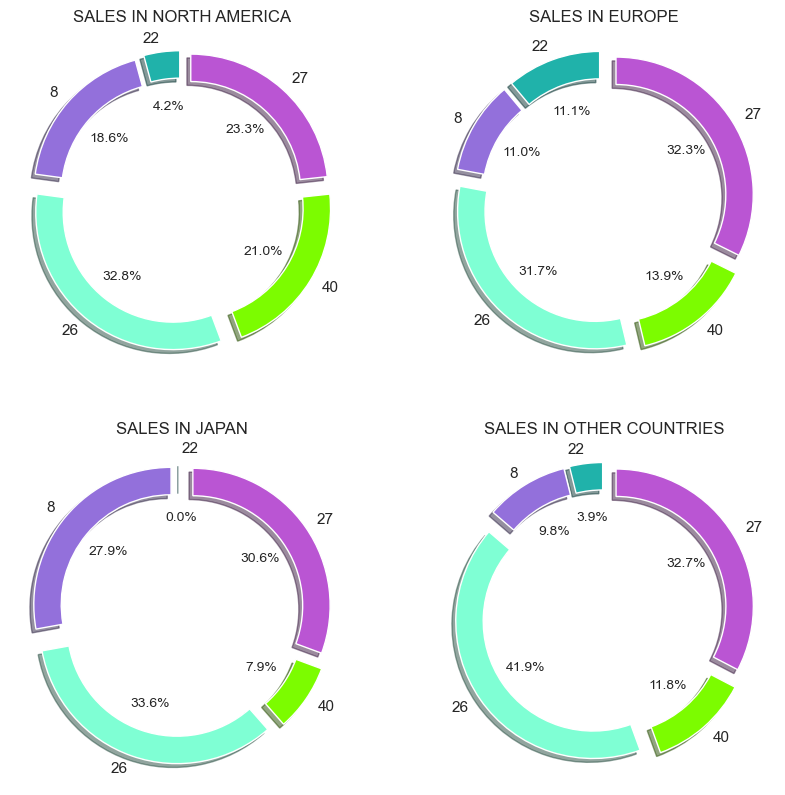

In [237]:
plt.figure(figsize= (10,10), dpi = 100)

plt.subplot(2,2,1)
platform_pie('Sales in North America'.upper(), na_sales)

plt.subplot(2,2,2)
platform_pie('Sales in Europe'.upper(), pal_sales)

plt.subplot(2,2,3)
platform_pie('Sales in Japan'.upper(), jp_sales)

plt.subplot(2,2,4)
platform_pie('Sales in Other countries'.upper(), other_sales)

#Total sales in each region
data = clean_df.groupby('Genre').sum().agg({'NA_Sales':'sum',
                                            'PAL_Sales':'sum',
                                            'Japan_Sales':'sum'})
data

**Conclusion:** PS2 & PS3 Consoles are the most popular platform in global Sales around the world,

 Compared to PC with the fewest sales although they are the console with the most game releases

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

NA Sales, PAL Sales & Japan_Sales by Genre

<AxesSubplot:xlabel='Genre'>

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Sale of games in each region')

Text(0.5, 1.0, 'Sales per Genre for each region')

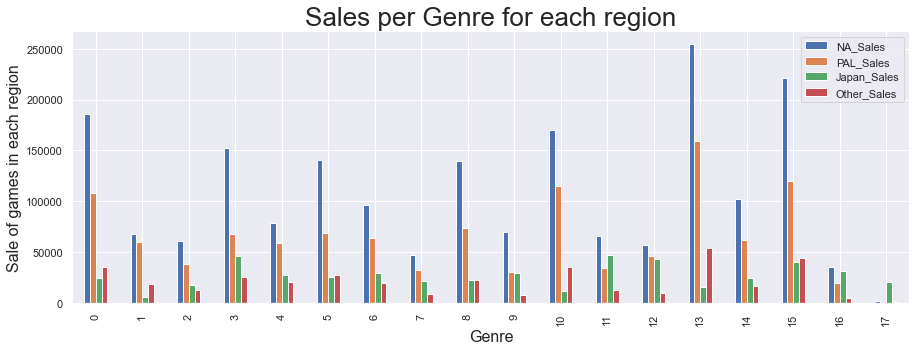

Console   NA_Sales  PAL_Sales  Japan_Sales
Genre                                            
0        79627  595210000  346840000     79820000
1        11268   36340000   32190000      3120000
2        33166   85870000   53770000     25190000
3        17974  105760000   47120000     32070000
4         1277    3950000    2940000      1390000
5        51941  304560000  150220000     56330000
6         3912   13110000    8640000      4010000
7         1437    2670000    1810000      1190000
8        19984  131160000   69440000     21090000
9        11247   43250000   19010000     18230000
10       31221  196040000  132270000     13820000
11       35454  107610000   56330000     77550000
12         290     690000     560000       520000
13       32807  315390000  197920000     20020000
14       19878   99460000   60110000     23660000
15       43557  356990000  194150000     65400000
16       19764   30020000   16600000     27140000
17        5187     410000      70000      3750000

In [238]:
#Grouping North American, Japan, European & Other region sales data as per Genre

data = clean_df
df3 = data.groupby(['Genre'])
val = df3['NA_Sales','PAL_Sales','Japan_Sales','Other_Sales'].aggregate(np.mean)
val.plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Sale of games in each region',fontsize=16)
plt.title('Sales per Genre for each region',fontsize=26)
plt.show()

Game = clean_df.Game
Genre = clean_df.Genre
Console= clean_df.Console
PAL_Sales=clean_df.PAL_Sales
Japan_Sales=clean_df.Japan_Sales
NA_Sales=clean_df.NA_Sales

#Genre with the highest total sales volume in each region
dfSales3 = {'Game':Game,'Genre': Genre, 
'NA_Sales':NA_Sales,'Console':Console,'PAL_Sales':PAL_Sales,'Japan_Sales':Japan_Sales}
dfSales3 = pd.DataFrame(dfSales3,columns = ['Game','Genre','Console','NA_Sales','PAL_Sales','Japan_Sales'])
dfbygenre = dfSales3.groupby(by=['Genre']).sum()
dfbygenre.head(18)

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

NA Sales, PAL Sales & Japan_Sales by Year

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Grouping sales data of each region yearly and plotting the same

<Figure size 2000x2000 with 0 Axes>

<AxesSubplot:xlabel='Relese_Year'>

Text(0.5, 1.0, 'Average sales by year for each region ')

<Figure size 2000x2000 with 0 Axes>

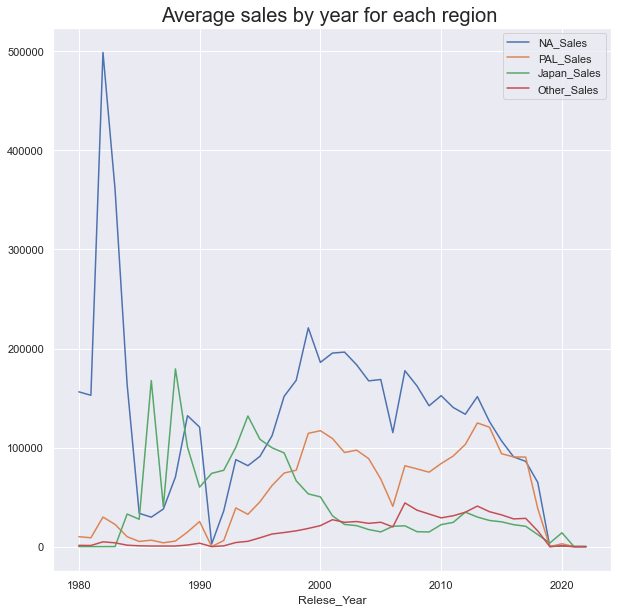

In [239]:
data = clean_df
df1 = data.groupby(['Relese_Year'])
plt.figure(figsize=(10,10), dpi=200)
df1_mean = df1['NA_Sales','PAL_Sales','Japan_Sales','Other_Sales'].aggregate(np.mean)
df1_mean.plot(figsize=(10,10))
plt.title('Average sales by year for each region ', fontsize=20)

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [240]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
clean_df['Genre'] = preprocessing.LabelEncoder().fit_transform(clean_df['Genre'])
clean_df['Console'] = preprocessing.LabelEncoder().fit_transform(clean_df['Console'])
clean_df['Publisher'] = preprocessing.LabelEncoder().fit_transform(clean_df['Publisher'])
clean_df['Developer'] = preprocessing.LabelEncoder().fit_transform(clean_df['Developer'])
clean_df['Developer'] = (clean_df['Developer'] - clean_df['Developer'].min()) / (clean_df['Developer'].max() - clean_df['Developer'].min())
clean_df['Total_Sales'] = (clean_df['Total_Sales'] - clean_df['Total_Sales'].min()) / (clean_df['Total_Sales'].max() - clean_df['Total_Sales'].min())
clean_df['Publisher'] = (clean_df['Publisher'] - clean_df['Publisher'].min()) / (clean_df['Publisher'].max() - clean_df['Publisher'].min())


Text(0.5, 0, 'Year')

Text(0.5, 0, 'Month')

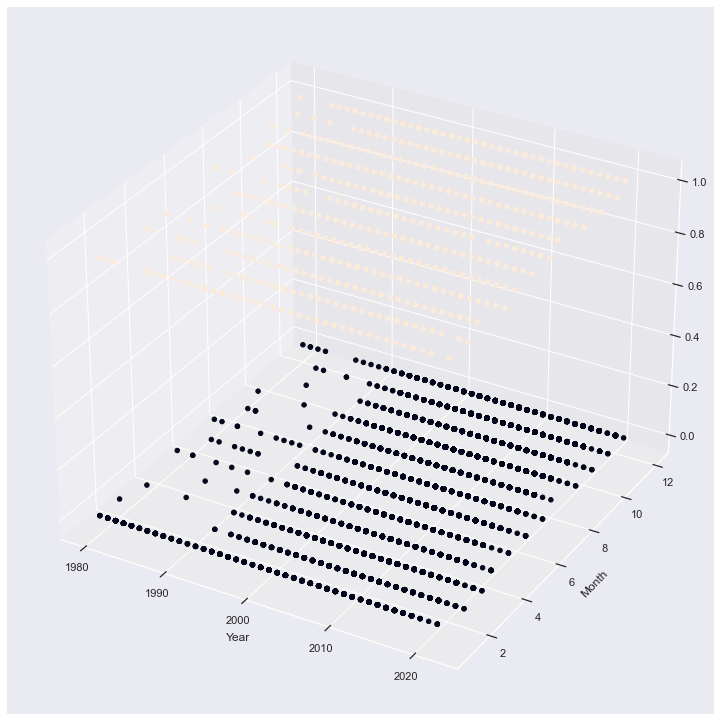

In [241]:
ax = plt.axes(projection = '3d')
x = clean_df.Relese_Year
y = clean_df.Relese_Month
z = clean_df.Hit_Games

plt.xlabel('Year')
plt.ylabel('Month')
ax.scatter3D(x,y,z,c = z,depthshade = False)


Text(0.5, 0, 'Year')

Text(0.5, 0, 'Console')

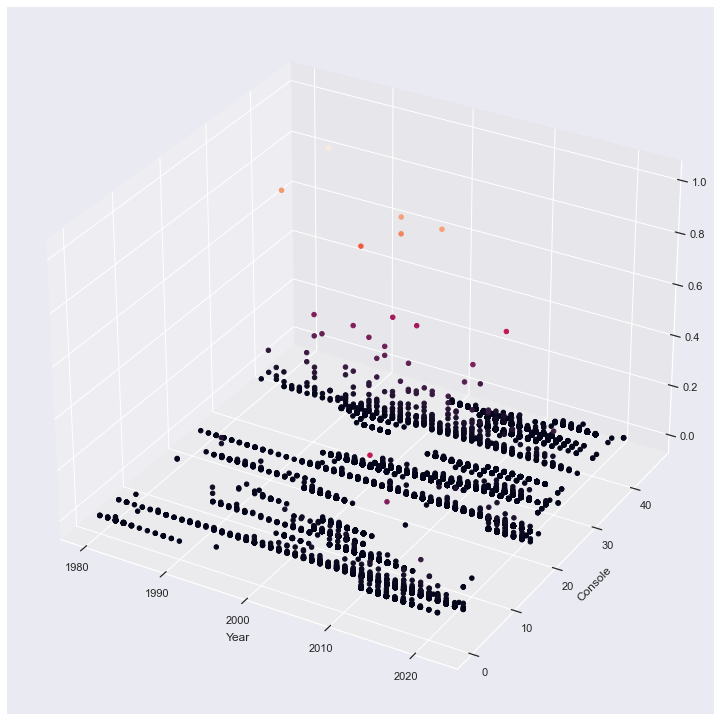

In [242]:
ax = plt.axes(projection = '3d')

x = clean_df.Relese_Year
y = clean_df.Console
z = clean_df.Total_Sales

plt.xlabel('Year')
plt.ylabel('Console')
ax.scatter3D(x,y,z,c = z,depthshade = False)


Text(0.5, 0, 'Genre')

Text(0.5, 0, 'Console')

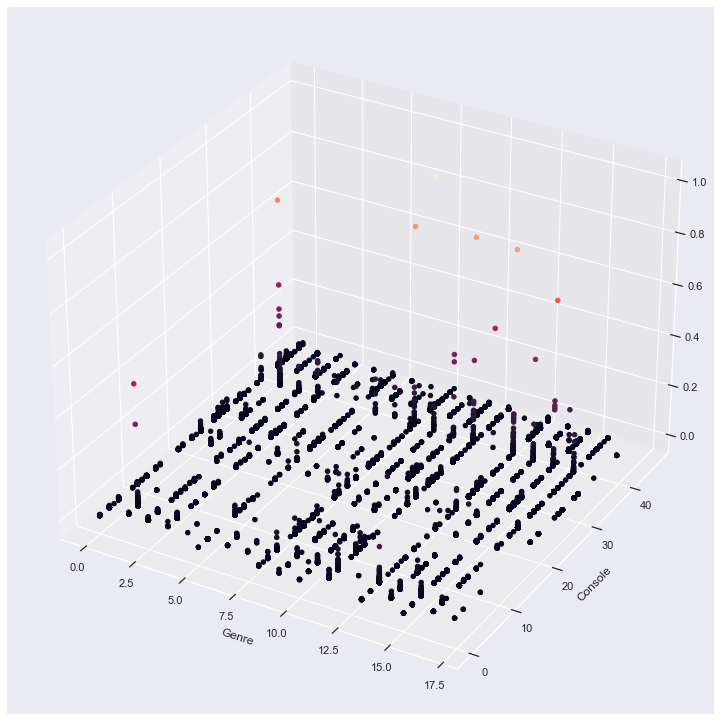

In [243]:
ax = plt.axes(projection = '3d')

x = clean_df.Genre
y = clean_df.Console
z = clean_df.Total_Sales

plt.xlabel('Genre')
plt.ylabel('Console')
ax.scatter3D(x,y,z,c = z,depthshade = False)

Text(0.5, 0, 'Publisher')

Text(0.5, 0, 'Year')

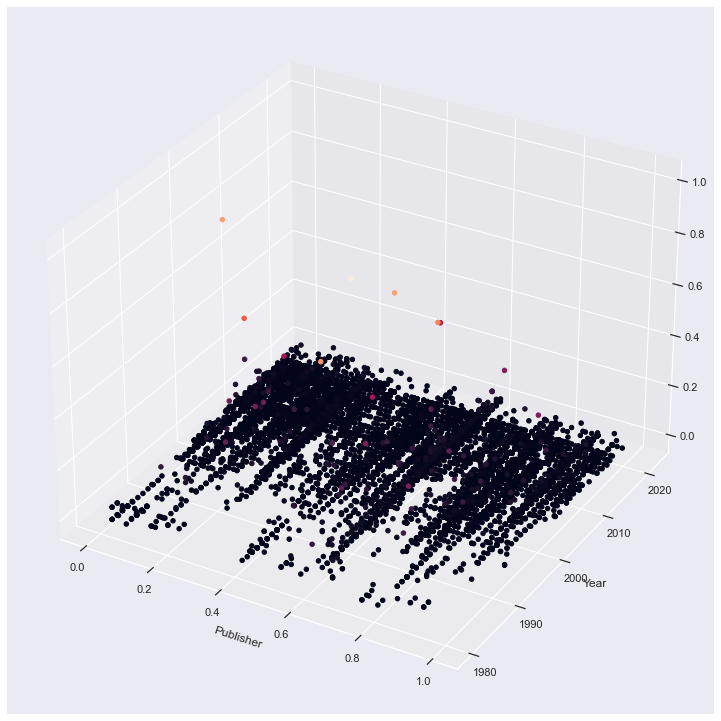

In [244]:
ax = plt.axes(projection = '3d')

x = clean_df.Publisher
y = clean_df.Relese_Year
z = clean_df.Total_Sales

plt.xlabel('Publisher')
plt.ylabel('Year')
ax.scatter3D(x,y,z,c = z,depthshade = False)

.

Hits VS Non-Hits by genre

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

heatmap

<AxesSubplot:>

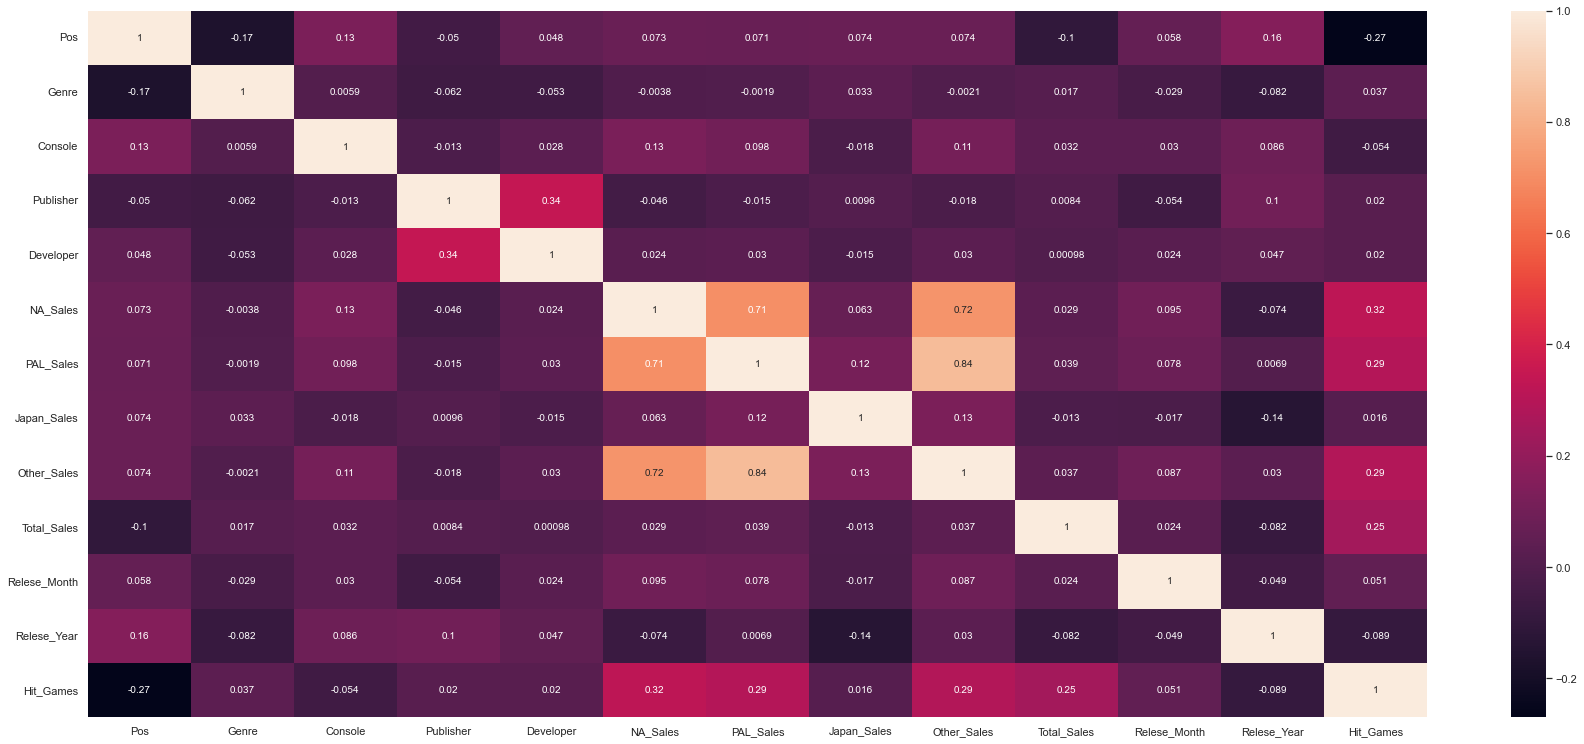

In [245]:
sns.heatmap(clean_df.corr(), annot=True)

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

this function will create a grid of Axes such that each numeric variable in data will by shared across
the y-axes across a single row and the x-axes across a single column.
The diagonal plots are treated differently: 
a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

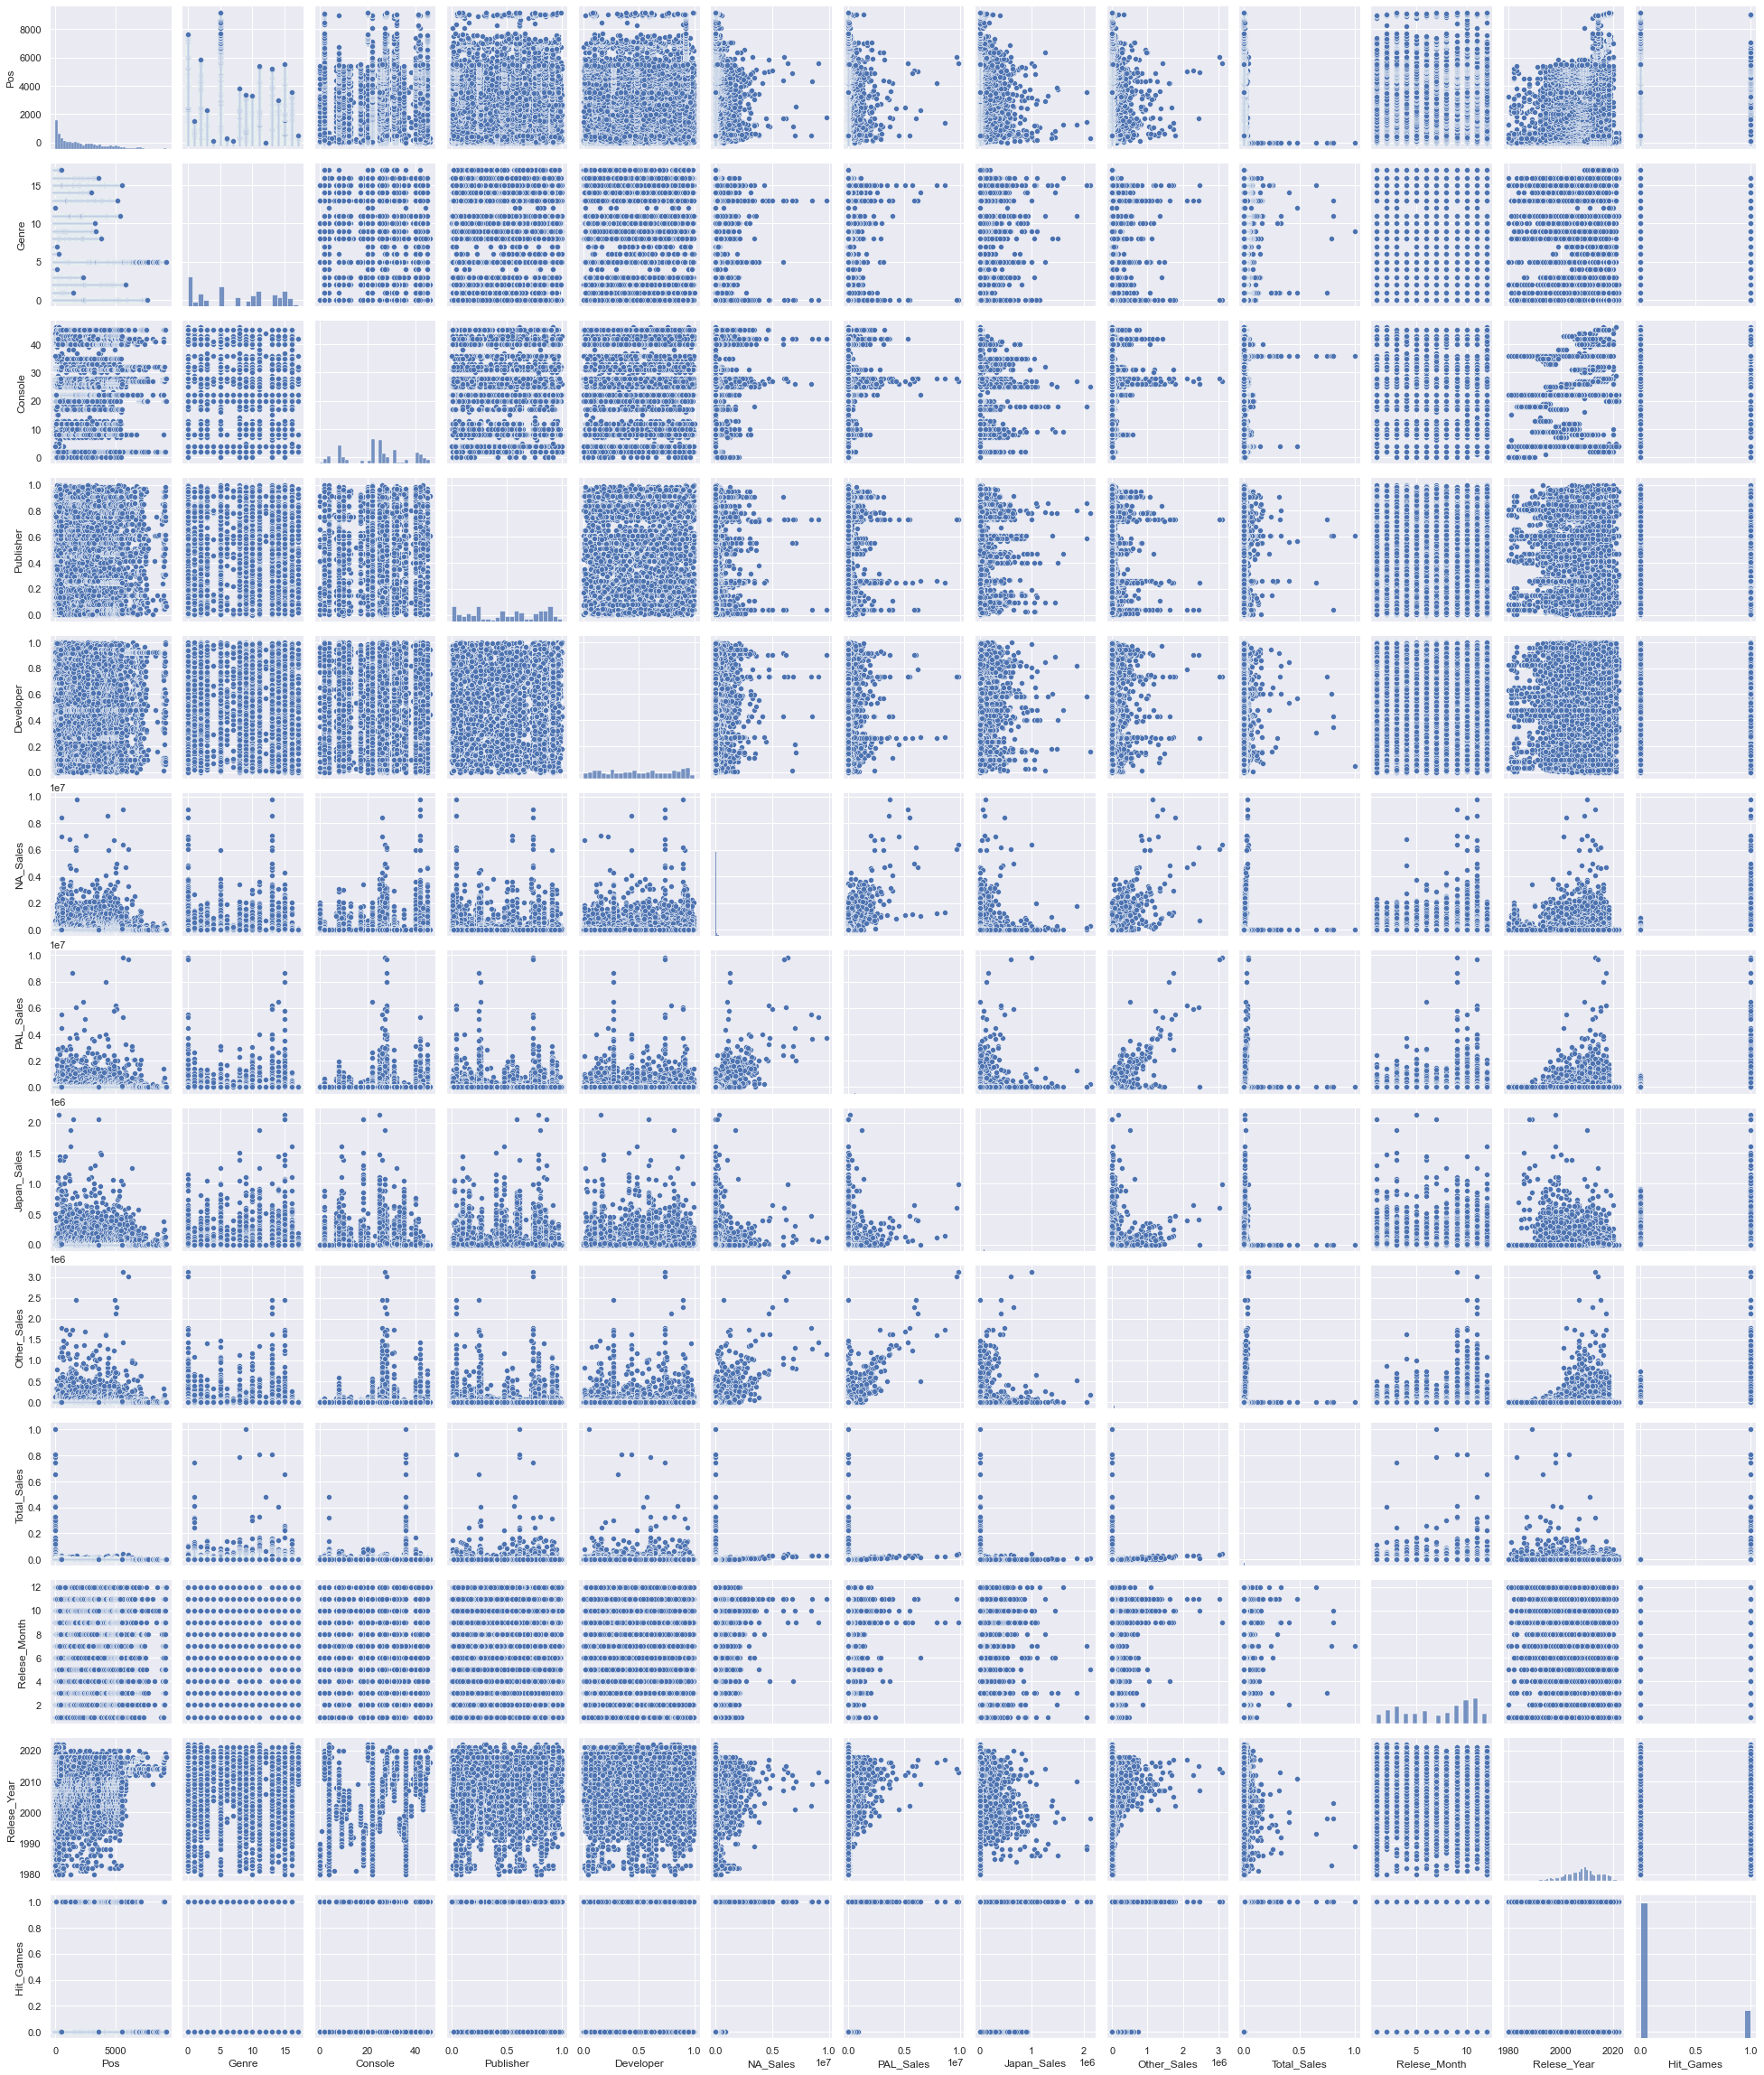

In [246]:
sns.pairplot(clean_df,aspect=.85)

Text(0.5, 1.0, 'Hits VS Non-Hits by genre')

Text(0.5, 0, 'Genre')

Text(0, 0.5, 'Amount')

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '8'),
 Text(7, 0, '9'),
 Text(8, 0, '10'),
 Text(9, 0, '11'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '16'),
 Text(14, 0, '17')]

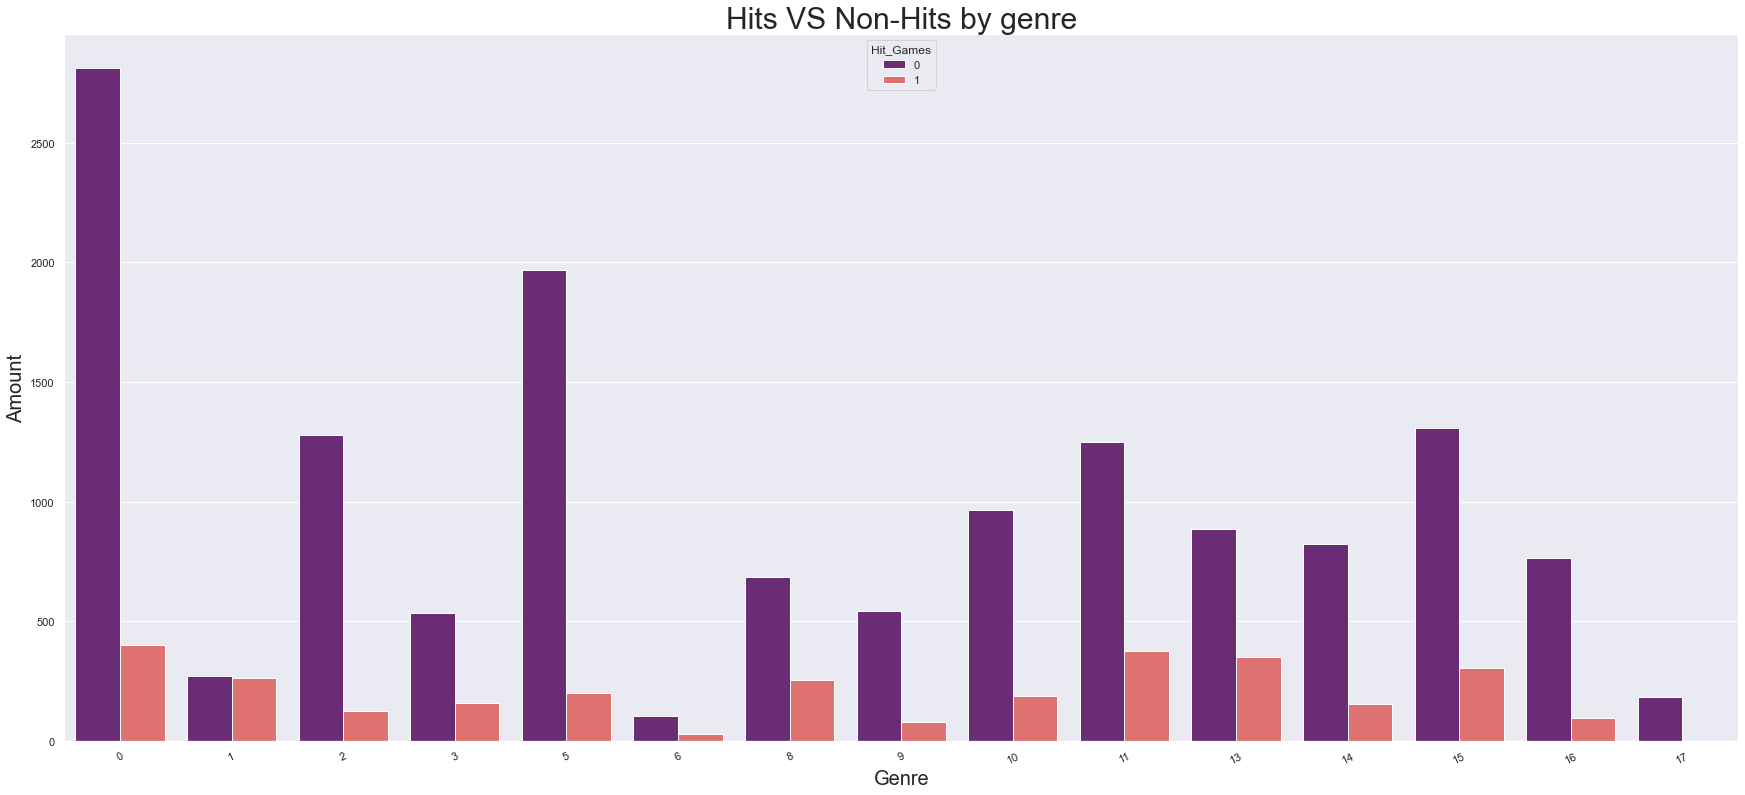

In [247]:
Genre_dist = clean_df[clean_df['Genre'].isin(clean_df.Genre.value_counts().head(15).index.tolist())]
ax = sns.countplot(x='Genre', hue='Hit_Games', data=Genre_dist, palette='magma')
ax.axes.set_title("Hits VS Non-Hits by genre",fontsize=30)
ax.set_xlabel("Genre",fontsize=20)
ax.set_ylabel("Amount",fontsize=20)
sns.set(rc = {'figure.figsize':(20,8)})
ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
plt.show()

# Inferences

Based on our analysis, we can infferd the following conclusions:

PS Platform, published in 1994, made the most sales worldwide. 
This is echoed by both Japan and EU regions. However, it is a different story in NA,
with Call of Duty: Black Ops dominating in north america and Grand Theft Auto V in Europe

50% of top 10 games utilized the PS Platform, making it one of the most successful consoles. 
This could be because of the fact that the PS system was one of the most innovative consoles of its time 


Action, Sports and Role-Playing are the most popular genres with high game titles as well as high global sales made

Nintendo snatched the spot for the Publisher that made the most global sales. 
Unsurprising is the fact that the top sales by developer is Nintendo!

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**